In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.decomposition import PCA # Principal Component Analysis module
from sklearn.cluster import KMeans # KMeans clustering 
import matplotlib.pyplot as plt # Python defacto plotting library
import seaborn as sns # More snazzy plotting library
%matplotlib inline 
df = pd.read_csv('CSV2.csv') # reads the csv and creates the dataframe called movie
df.head(n=2)
# pd.read_csv('file.csv')

,id,age,birthdate,sex,salary,size,breakfast,lunch,dinner,late,...,shabu,grill,steak,fastfood,cake,dessert,coffee,juice,created_at,user_id
0,1,21,1996-07-19,male,"น้อยกว่า 10,000",fit,f,t,t,f,...,f,f,t,t,t,t,f,t,2018-02-12 10:15:15.007524+00,4
1,2,20,1998-02-13,female,"น้อยกว่า 10,000",thin,f,t,t,t,...,f,f,f,t,t,f,f,f,2018-02-18 04:35:55.301258+00,23


In [13]:
df2=df.drop(['id','birthdate','created_at',],1)
sex = {'male':0,'female':1}
size={'thin':0,'fit':1,'chubby':2,'fat':3}
salary={'น้อยกว่า 10,000':0,'10,000-19,999':1,'20,000-29,999':2,'30,000-39,999':3,'40,000-49,999':4,'50,000 ขึ้นไป':5}
breakfast = {'f':0,'t':1}
lunch = {'f':0,'t':1}
dinner = {'f':0,'t':1}
late = {'f':0,'t':1}
taste = {'f':0,'t':1}
price = {'f':0,'t':1}
service = {'f':0,'t':1}
clean = {'f':0,'t':1}
at = {'f':0,'t':1}
location = {'f':0,'t':1}
facebook = {'f':0,'t':1}
twitter = {'f':0,'t':1}
instagram = {'f':0,'t':1}
line = {'f':0,'t':1}
japanese = {'f':0,'t':1}
thai = {'f':0,'t':1}
diet = {'f':0,'t':1}
shabu = {'f':0,'t':1}
grill = {'f':0,'t':1}
steak = {'f':0,'t':1}
fastfood = {'f':0,'t':1}
cake = {'f':0,'t':1}
dessert = {'f':0,'t':1}
coffee = {'f':0,'t':1}
juice = {'f':0,'t':1}

for k,i in df2.iterrows():
    if i['sex']==i['sex']:
        df2.loc[k,"sexc"]=sex[i['sex']]
    if i['size']==i['size']:
        df2.loc[k,"sizec"]=size[i['size']]
    if i['salary']==i['salary']:
        df2.loc[k,"salaryc"]=salary[i['salary']]
    if i['breakfast']==i['breakfast']:
        df2.loc[k,"breakfastc"]=breakfast[i['breakfast']]
    if i['lunch']==i['lunch']:
        df2.loc[k,"lunchc"]=lunch[i['lunch']]
    if i['dinner']==i['dinner']:
        df2.loc[k,"dinnerc"]=breakfast[i['dinner']]
    if i['late']==i['late']:
        df2.loc[k,"latec"]=late[i['late']]
    if i['taste']==i['taste']:
        df2.loc[k,"tastec"]=taste[i['taste']]
    if i['price']==i['price']:
        df2.loc[k,"pricec"]=price[i['price']]
    if i['service']==i['service']:
        df2.loc[k,"servicec"]=service[i['service']]
    if i['clean']==i['clean']:
        df2.loc[k,"cleanc"]=clean[i['clean']]
    if i['at']==i['at']:
        df2.loc[k,"atc"]=at[i['at']]
    if i['location']==i['location']:
        df2.loc[k,"locationc"]=location[i['location']]
    if i['facebook']==i['facebook']:
        df2.loc[k,"facebookc"]=facebook[i['facebook']]
    if i['twitter']==i['twitter']:
        df2.loc[k,"twitterc"]=twitter[i['twitter']]
    if i['instagram']==i['instagram']:
        df2.loc[k,"instagramc"]=instagram[i['instagram']]
    if i['line']==i['line']:
        df2.loc[k,"linec"]=line[i['line']]
    if i['japanese']==i['japanese']:
        df2.loc[k,"japanesec"]=japanese[i['japanese']]
    if i['thai']==i['thai']:
        df2.loc[k,"thaic"]=thai[i['thai']]
    if i['diet']==i['diet']:
        df2.loc[k,"dietc"]=diet[i['diet']]
    if i['shabu']==i['shabu']:
        df2.loc[k,"shabuc"]=shabu[i['shabu']]
    if i['grill']==i['grill']:
        df2.loc[k,"grillc"]=grill[i['grill']]
    if i['steak']==i['steak']:
        df2.loc[k,"steakc"]=steak[i['steak']]
    if i['fastfood']==i['fastfood']:
        df2.loc[k,"fastfoodc"]=fastfood[i['fastfood']]
    if i['cake']==i['cake']:
        df2.loc[k,"cakec"]=grill[i['cake']]
    if i['dessert']==i['dessert']:
        df2.loc[k,"dessertc"]=dessert[i['dessert']]
    if i['coffee']==i['coffee']:
        df2.loc[k,"coffeec"]=coffee[i['coffee']]
    if i['juice']==i['juice']:
        df2.loc[k,"juicec"]=juice[i['juice']]

In [14]:
df2=df2.drop(['sex','size','salary'
            ,'breakfast','lunch','dinner','late','taste','price','service','clean',
            'at','location','facebook','twitter','instagram','line','japanese','thai','diet','shabu','grill',
            'steak','fastfood','cake','dessert','coffee','juice'],1)
df2.head()

,age,user_id,sexc,sizec,salaryc,breakfastc,lunchc,dinnerc,latec,tastec,...,thaic,dietc,shabuc,grillc,steakc,fastfoodc,cakec,dessertc,coffeec,juicec
0,21,4,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0
1,20,23,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
2,22,29,1.0,3.0,0.0,0.0,1.0,1.0,0.0,1.0,...,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0
3,19,30,0.0,2.0,0.0,1.0,1.0,1.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0
4,18,31,1.0,3.0,0.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0


In [101]:
df2['facebookc'].value_counts()
df2.groupby('age')['facebookc'].value_counts()

# df2.groupby('user_id')['facebookc'].value_counts()

# df2['facebookc'].sum()
# # df_social=pd.DataFrame(df['day_of_week'].value_counts())
# # [df2['facebookc'].sum(),df2['linec'].sum(),df2['instagramc'].sum(),df2['twitterc'].sum()]
# df_social = pd.DataFrame(columns=['amount'], index=['facebook','line','twitter','instragram'])
# # df_social['facebookc']=df2['facebookc'].sum()
# # df_social['linec']=df2['linec'].sum()
# # df_social['instagramc']=df2['instagramc'].sum()
# # df_social['twitterc']=df2['twitterc'].sum()
# df_social.loc['facebook'] = pd.Series({'amount':df2['facebookc'].sum()})
# df_social.loc['line'] = pd.Series({'amount':df2['linec'].sum()})
# df_social.loc['twitter'] = pd.Series({'amount':df2['twitterc'].sum()})
# df_social.loc['instragram'] = pd.Series({'amount':df2['instagramc'].sum()})

age  facebookc
-1   1.0           1
 0   0.0           3
     1.0           1
 18  1.0           6
     0.0           4
 19  1.0          21
     0.0          10
 20  1.0          15
     0.0          11
 21  1.0          18
     0.0          13
 22  1.0          12
     0.0           6
 23  1.0           3
     0.0           1
 24  1.0           1
 32  1.0           1
 34  0.0           1
 37  1.0           1
 47  0.0           1
 53  1.0           1
Name: facebookc, dtype: int64

# Age with Social Media

In [127]:
df2.groupby('age')['facebookc'].value_counts().unstack().fillna(0)

facebookc,0.0,1.0
age,,
-1,0.0,1.0
0,3.0,1.0
18,4.0,6.0
19,10.0,21.0
20,11.0,15.0
21,13.0,18.0
22,6.0,12.0
23,1.0,3.0
24,0.0,1.0


In [146]:
temppd2= pd.DataFrame(df2.groupby('age')['twitterc'].value_counts().unstack().fillna(0))

In [147]:
temppd2['twitterc'] = temppd2[1]
temppd2=temppd2.drop([0,1],1)

In [148]:
temppd2

twitterc,twitterc
age,
-1,0.0
0,0.0
18,7.0
19,19.0
20,12.0
21,13.0
22,9.0
23,0.0
24,0.0


In [149]:
temp = temp.join(temppd2)

In [152]:
# temp=temp.drop([1],1)
#
df_social_sge = temp
df_social_sge.head()

,facebook,line,instagramc,twitterc
age,,,,
-1,1.0,0.0,0.0,0.0
0,1.0,4.0,1.0,0.0
18,6.0,10.0,7.0,7.0
19,21.0,25.0,20.0,19.0
20,15.0,17.0,14.0,12.0


In [87]:
df2['facebookc'].sum()
# df_social=pd.DataFrame(df['day_of_week'].value_counts())
# [df2['facebookc'].sum(),df2['linec'].sum(),df2['instagramc'].sum(),df2['twitterc'].sum()]
df_social = pd.DataFrame(columns=['facebook','line','instagram','twitter'], index=['0'])
df_social['facebook']=df2['facebookc'].sum()
df_social['line']=df2['linec'].sum()
df_social['instagram']=df2['instagramc'].sum()
df_social['twitter']=df2['twitterc'].sum()

In [168]:
# df2['twitterc'].value_counts()
df_social_sge = df_social_sge.rename(columns={'instagramc': 'instagram', 'twitterc': 'twitter'})


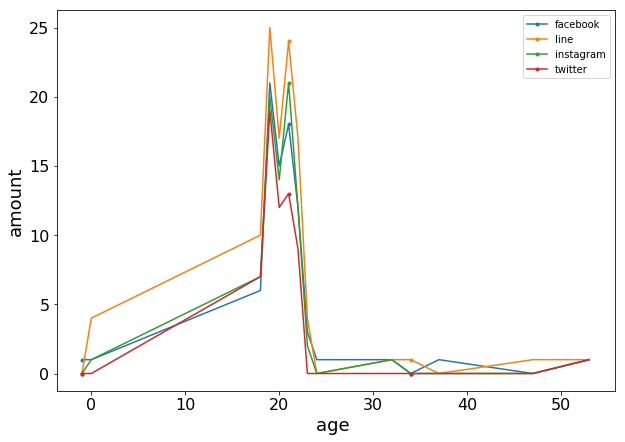

In [169]:
# plt.figure(figsize = (20,20))

df_social_sge.plot(style='.-', markevery=5,figsize = (10,7))
plt.xlabel('age ', fontsize=18)
plt.ylabel('amount' ,fontsize=18)
plt.xticks(size = 16)
plt.yticks(size = 16)
plt.show()

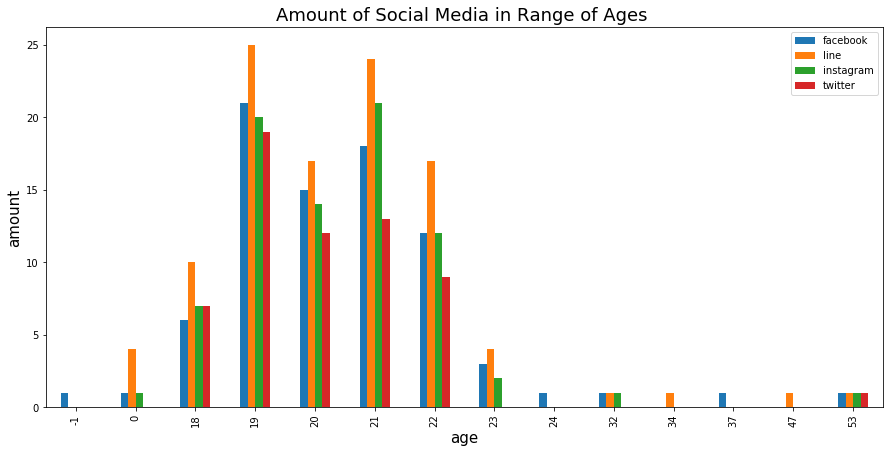

In [170]:

# df_social_sge.plot(kind = "bar",figsize = (15,7))
ax= df_social_sge.plot(kind = "bar",figsize = (15,7))
ax.set_title("Amount of Social Media in Range of Ages ",fontsize=18)

ax.set_xlabel("age",fontsize=15)
# ax.set_xticklabels(df_social_sge.index)

ax.set_ylabel("amount",fontsize=15)
plt.show()

In [ ]:
df_social.columns

In [16]:
f1 = df2['salaryc'].values
f2 = df2['age'].values
f3 = df2['sexc'].values
f4 = df2['salaryc'].values
f5 = df2['breakfastc'].values
f6 = df2['lunchc'].values
f7 = df2['dinnerc'].values
f8 = df2['shabuc'].values
f9 = df2['grillc'].values
f10 = df2['steakc'].values
f11 = df2['fastfoodc'].values
f12 = df2['cakec'].values
f13 = df2['dessertc'].values
f14 = df2['coffeec'].values
f15 = df2['juicec'].values
f16 = df2['user_id'].values

# X = np.array(list(zip(f4,f5)))
X = np.array(list(zip(f1, f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15)))
# Data Normalization
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X)

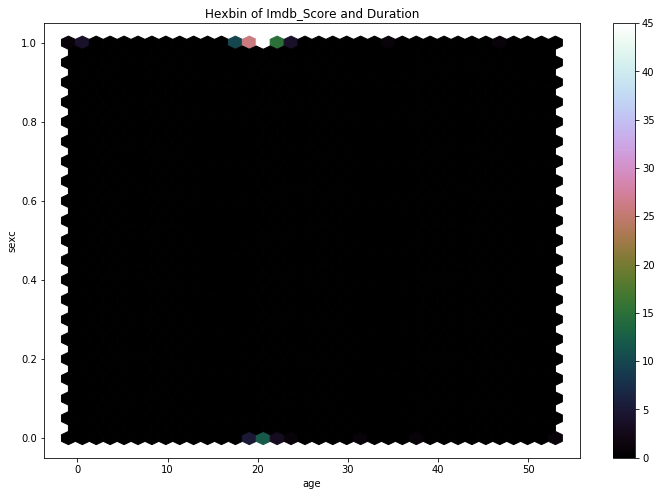

In [172]:
df2.plot(y= 'sexc', x ='age',kind='hexbin',gridsize=35, sharex=False, colormap='cubehelix', title='Hexbin of Imdb_Score and Duration',figsize=(12,8))


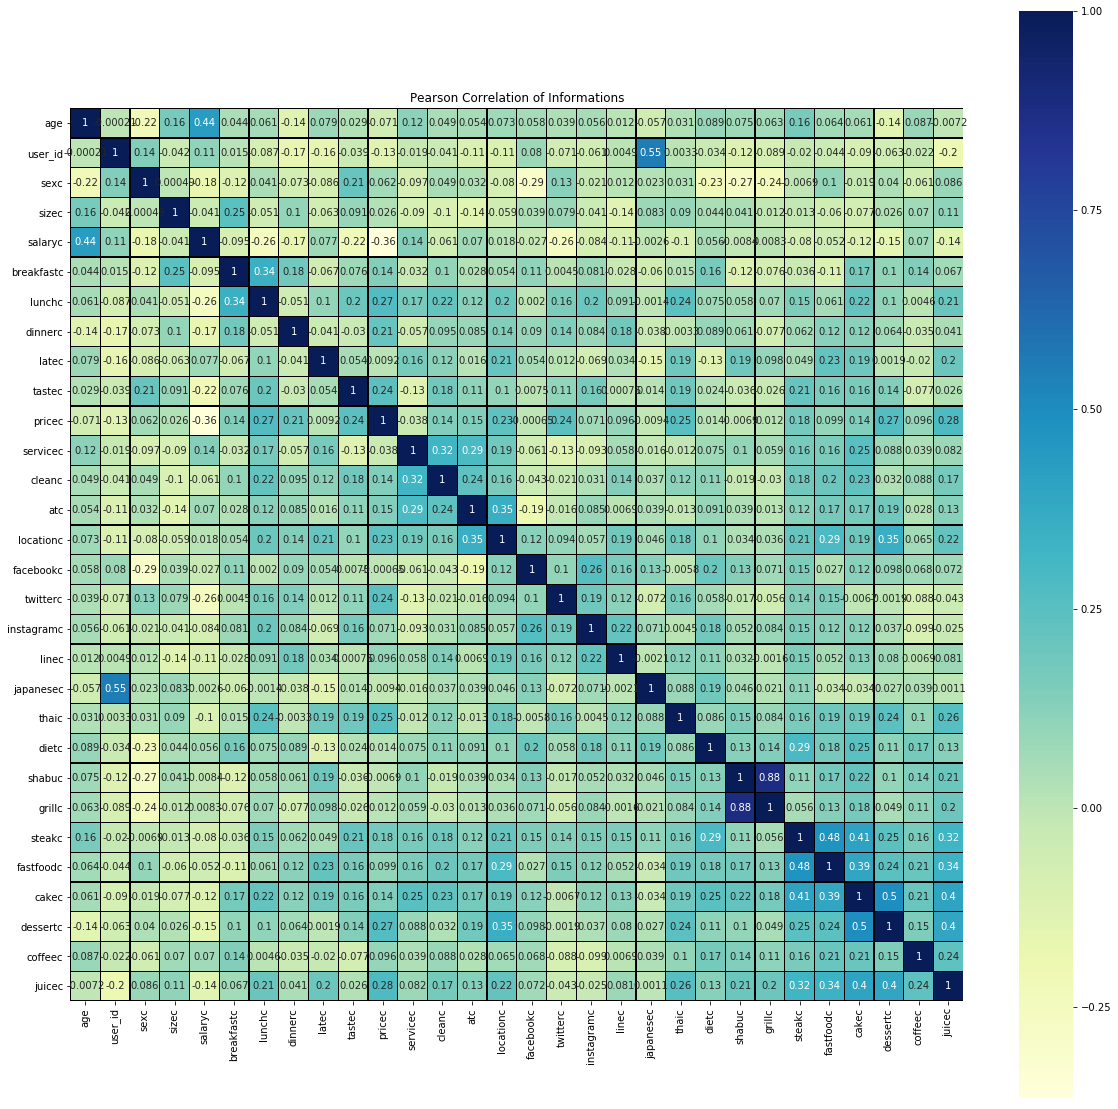

In [18]:
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(20, 20))
plt.title('Pearson Correlation of Informations')
# Draw the heatmap using seaborn
sns.heatmap(df2.astype(float).corr(),linewidths=0.25,vmax=1.0, square=True, cmap="YlGnBu", linecolor='black', annot=True)

4
Estimated number of clusters: 4
Silhouette Coefficient: 0.491


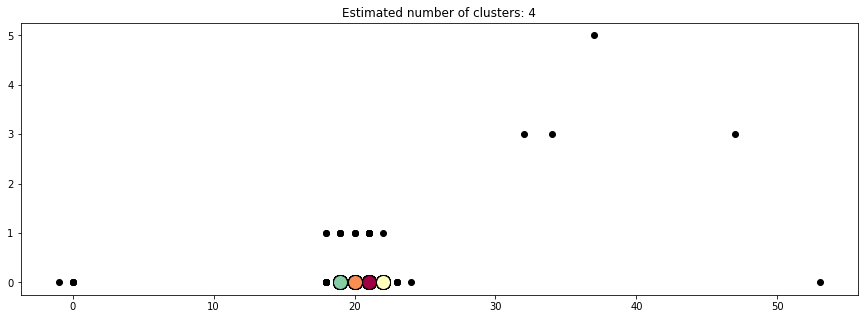

In [125]:
f1 = df2['salaryc'].values
f2 = df2['age'].values
f3 = df2['sexc'].values
f4 = df2['salaryc'].values
f5 = df2['breakfastc'].values
f6 = df2['lunchc'].values
f7 = df2['dinnerc'].values
f8 = df2['shabuc'].values
f9 = df2['grillc'].values
f10 = df2['steakc'].values
f11 = df2['fastfoodc'].values
f12 = df2['cakec'].values
f13 = df2['dessertc'].values
f14 = df2['coffeec'].values
f15 = df2['juicec'].values
X = np.array(list(zip(f2,f1)))
# X = np.array(list(zip(f1, f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15)))
# X = df2['age'].values
# print(X)
# X, labels_true = make_blobs(X, centers=centers, cluster_std=0.4,random_state=0)
# X = StandardScaler().fit_transform(X)

db = DBSCAN(eps=0.3, min_samples=10).fit(X)
# print(db)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
# print(core_samples_mask)
core_samples_mask[db.core_sample_indices_] = True
# print(core_samples_mask)
labels = db.labels_

n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
print(n_clusters_)

print('Estimated number of clusters: %d' % n_clusters_)
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, labels))

# #############################################################################
# Plot result
import matplotlib.pyplot as plt
plt.figure(figsize=(15,5))

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()


5
Estimated number of clusters: 5
Silhouette Coefficient: 0.660


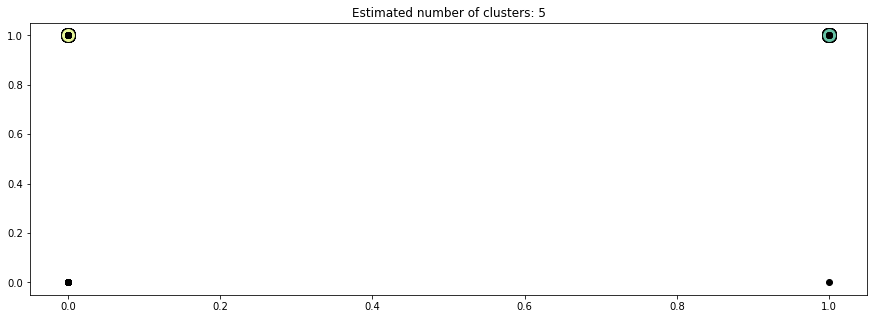

In [36]:
import numpy as np

from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets.samples_generator import make_blobs
from sklearn.preprocessing import StandardScaler


f1 = df2['salaryc'].values
f2 = df2['age'].values
f3 = df2['sexc'].values
f4 = df2['salaryc'].values
f5 = df2['breakfastc'].values
f6 = df2['lunchc'].values
f7 = df2['dinnerc'].values
f8 = df2['shabuc'].values
f9 = df2['grillc'].values
f10 = df2['steakc'].values
f11 = df2['fastfoodc'].values
f12 = df2['cakec'].values
f13 = df2['dessertc'].values
f14 = df2['coffeec'].values
f15 = df2['juicec'].values
f16 = df2['user_id'].values
f17 = df2['sizec'].values

X = np.array(list(zip(f5,f6,f7,f17)))
# X = np.array(list(zip(f1,f8,f9,f10,f11,f12,f13,f14,f15)))
# X = df2['age'].values
# print(X)
# X, labels_true = make_blobs(X, centers=centers, cluster_std=0.4,random_state=0)
# X = StandardScaler().fit_transform(X)

db = DBSCAN(eps=0.3, min_samples=10).fit(X)
# print(db)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
# print(core_samples_mask)
core_samples_mask[db.core_sample_indices_] = True
# print(core_samples_mask)
labels = db.labels_

n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
print(n_clusters_)

print('Estimated number of clusters: %d' % n_clusters_)
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, labels))

# #############################################################################
# Plot result
import matplotlib.pyplot as plt
plt.figure(figsize=(15,5))

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()


4
Estimated number of clusters: 4
Silhouette Coefficient: 0.305


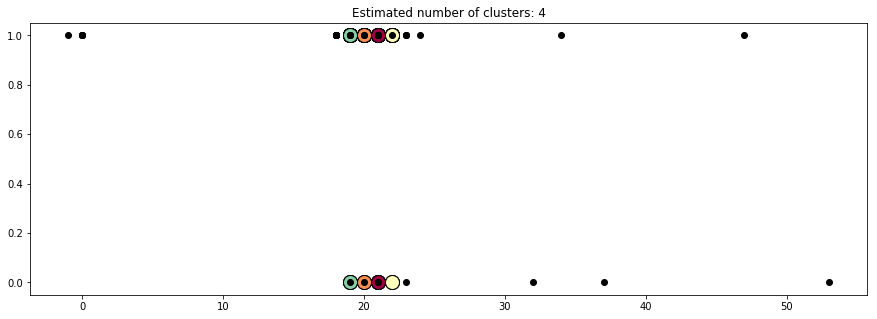

In [127]:
f1 = df2['salaryc'].values
f2 = df2['age'].values
f3 = df2['sexc'].values
f4 = df2['salaryc'].values
f5 = df2['breakfastc'].values
f6 = df2['lunchc'].values
f7 = df2['dinnerc'].values
f8 = df2['shabuc'].values
f9 = df2['grillc'].values
f10 = df2['steakc'].values
f11 = df2['fastfoodc'].values
f12 = df2['cakec'].values
f13 = df2['dessertc'].values
f14 = df2['coffeec'].values
f15 = df2['juicec'].values
X = np.array(list(zip(f2,f3)))
# X = np.array(list(zip(f1, f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15)))
# X = df2['age'].values
# print(X)
# X, labels_true = make_blobs(X, centers=centers, cluster_std=0.4,random_state=0)
# X = StandardScaler().fit_transform(X)

# db = DBSCAN(eps=0.3, min_samples=10).fit(X)
# print(db)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
# print(core_samples_mask)
core_samples_mask[db.core_sample_indices_] = True
# print(core_samples_mask)
labels = db.labels_

n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
print(n_clusters_)

print('Estimated number of clusters: %d' % n_clusters_)
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, labels))

# #############################################################################
# Plot result
import matplotlib.pyplot as plt
plt.figure(figsize=(15,5))

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

# plt.figure(figsize = (7,7))
plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()


Estimated number of clusters: 3
Homogeneity: 0.953
Completeness: 0.883
V-measure: 0.917
Adjusted Rand Index: 0.952
Adjusted Mutual Information: 0.883
Silhouette Coefficient: 0.626


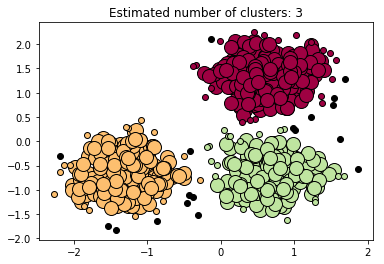

In [76]:
import numpy as np

from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets.samples_generator import make_blobs
from sklearn.preprocessing import StandardScaler


# #############################################################################
# Generate sample data
centers = [[1, 1], [-1, -1], [1, -1]]
X, labels_true = make_blobs(n_samples=750, centers=centers, cluster_std=0.4,
                            random_state=0)

X = StandardScaler().fit_transform(X)

# #############################################################################
# Compute DBSCAN
db = DBSCAN(eps=0.3, min_samples=10).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)

core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_
# print(labels)


# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

print('Estimated number of clusters: %d' % n_clusters_)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels))
print("Completeness: %0.3f" % metrics.completeness_score(labels_true, labels))
print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels))
print("Adjusted Rand Index: %0.3f"
      % metrics.adjusted_rand_score(labels_true, labels))
print("Adjusted Mutual Information: %0.3f"
      % metrics.adjusted_mutual_info_score(labels_true, labels))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, labels))

# #############################################################################
# Plot result
import matplotlib.pyplot as plt

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

In [22]:
centers = [[1, 1], [-1, -1], [1, -1]]
X, labels_true = make_blobs(n_samples=750, centers=centers, cluster_std=0.4,
                            random_state=0)

In [24]:
labels_true

array([0, 1, 0, 2, 0, 1, 1, 2, 0, 0, 1, 1, 1, 2, 1, 0, 1, 1, 2, 2, 2, 2,
       2, 2, 1, 1, 2, 0, 0, 2, 0, 1, 1, 0, 1, 0, 2, 0, 0, 2, 2, 1, 1, 1,
       1, 1, 0, 2, 0, 1, 2, 2, 1, 1, 2, 2, 1, 0, 2, 1, 2, 2, 2, 2, 2, 0,
       2, 2, 0, 0, 0, 2, 0, 0, 2, 1, 0, 1, 0, 2, 1, 1, 0, 0, 0, 0, 1, 2,
       1, 2, 2, 0, 1, 0, 1, 0, 1, 1, 0, 0, 2, 1, 2, 0, 2, 2, 2, 2, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 2, 1, 0, 0, 1, 2, 1, 0, 0, 2, 0, 2,
       2, 2, 0, 1, 2, 2, 0, 1, 0, 2, 0, 0, 2, 2, 2, 2, 1, 0, 2, 1, 1, 2,
       2, 2, 0, 1, 0, 1, 0, 1, 0, 2, 2, 1, 1, 2, 2, 1, 0, 1, 2, 2, 2, 1,
       1, 2, 2, 0, 1, 2, 0, 0, 2, 0, 0, 1, 0, 1, 0, 1, 1, 2, 2, 0, 0, 1,
       1, 2, 1, 2, 2, 2, 2, 0, 2, 0, 2, 2, 0, 2, 2, 2, 0, 0, 1, 1, 1, 2,
       2, 2, 2, 1, 2, 2, 0, 0, 2, 0, 0, 0, 1, 0, 1, 1, 1, 2, 1, 1, 0, 1,
       2, 2, 1, 2, 2, 1, 0, 0, 1, 1, 1, 0, 1, 0, 2, 0, 2, 0, 2, 2, 2, 1,
       1, 0, 0, 1, 1, 0, 0, 2, 1, 2, 2, 1, 1, 2, 1, 2, 0, 2, 2, 0, 1, 2,
       2, 0, 2, 2, 0, 0, 2, 0, 2, 0, 2, 1, 0, 0, 0,

In [75]:
# X, labels_true = make_blobs(n_samples=750, centers=centers, cluster_std=0.4,random_state=0)
# print(X)
# print("labels_true",labels_true)

In [128]:
df = pd.read_csv('session_csv.csv') # reads the csv and creates the dataframe called movie
df.head(n=2)

,id,action,value,created_at,user_id
0,1144,enter,home,2018-02-21 08:30:45.169158+00,52
1,1148,enter,home,2018-02-21 10:07:01.98235+00,52


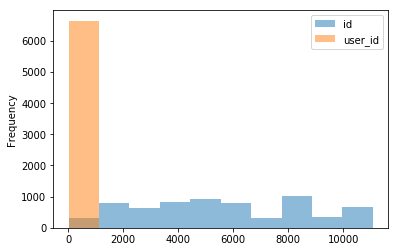

In [129]:
df.plot.hist(alpha=0.5)

# Order

In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.decomposition import PCA # Principal Component Analysis module
from sklearn.cluster import KMeans # KMeans clustering 
import matplotlib.pyplot as plt # Python defacto plotting library
import seaborn as sns # More snazzy plotting library
%matplotlib inline 
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets.samples_generator import make_blobs
from sklearn.preprocessing import StandardScaler

df3 = pd.read_csv('order_csv.csv') # reads the csv and creates the dataframe called movie
df3.head(n=2)

,id,menu,amount,date,address,total,phone_number,slip_payment,delivery_charge,payment_method,coupon,created_at,store_id,user_id,morethings,status,isSuccess
0,181,{184},{1},2018-03-09 12:40:49.596791+00,หอ C10,55,"""0958171957""",NaN,10,จ่ายเงินปลายทาง,NaN,2018-03-09 12:40:49.597613+00,1,96,NaN,กำลังส่ง,t
1,193,"{199,242}","{1,1}",2018-03-11 12:24:20.207649+00,หอ C-6,75,"""0908390241""",NaN,10,จ่ายเงินปลายทาง,NaN,2018-03-11 12:24:20.208554+00,1,134,NaN,กำลังส่ง,t


In [39]:
from datetime import datetime, timedelta

df3['created_at'] = pd.to_datetime(df3["created_at"])
df3['created_atc']=df3['created_at'].dt.tz_localize('UTC').dt.tz_convert('Asia/Bangkok')
df_time = pd.to_datetime(df3["created_atc"])
# df['created_atc']=df['created_at'].dt.tz_localize('UTC').dt.tz_convert('Asia/Bangkok')
date = df_time.value_counts().keys().tolist()
ourdates = pd.to_datetime(date, format='%d/%b/%Y:%H:%M:%S')
type(ourdates)
list_date = []
for i in ourdates:

    e =  i.strftime('%Y-%m-%d %H:%M:%S')
    list_date.append(e)
# print(type(e))

In [55]:
# df3['created_atc']
new_df = pd.DataFrame(columns = ['hour','minute','hourfloat','x','y'])
for i in list_date :
    temp = i.split(' ')
    temp2 = temp[1].split(':')
    
    hourfloat = (int(temp2[0])+int(temp2[1]))/2.0
    x=np.sin(2.*np.pi*hourfloat/24.)
    y=np.cos(2.*np.pi*hourfloat/24.)

    new_df.loc[len(new_df)] = [int(temp2[0]), int(temp2[1]),hourfloat,x,y]

In [155]:
def kmeansshow(k,X):

    from sklearn import cluster
    from matplotlib import pyplot
    import numpy as np

    kmeans = cluster.KMeans(n_clusters=k)
    kmeans.fit(X)

    labels = kmeans.labels_
    centroids = kmeans.cluster_centers_
    #print centroids

    for i in range(k):
        # select only data observations with cluster label == i
        ds = X[np.where(labels==i)]
        # plot the data observations
        pyplot.plot(ds[:,0],ds[:,1],'o')
        # plot the centroids
        lines = pyplot.plot(centroids[i,0],centroids[i,1],'kx')
        # make the centroid x's bigger
        pyplot.setp(lines,ms=15.0)
        pyplot.setp(lines,mew=2.0)
    pyplot.show()
    return centroids

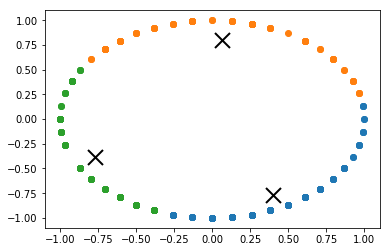

array([[ 0.40043146, -0.77292921],
       [ 0.06497757,  0.80269784],
       [-0.76813159, -0.38186095]])

In [157]:
kmeansshow(3,new_df[['x', 'y']].values)


In [117]:
list_date

['2018-03-13 19:44:34',
 '2018-03-06 19:55:14',
 '2018-02-27 17:34:32',
 '2018-04-08 19:26:45',
 '2018-04-05 19:22:07',
 '2018-03-13 21:41:32',
 '2018-03-16 18:36:22',
 '2018-03-13 21:55:55',
 '2018-04-20 19:01:27',
 '2018-02-24 17:45:33',
 '2018-04-08 18:54:06',
 '2018-03-21 17:24:08',
 '2018-02-18 10:08:36',
 '2018-02-27 20:25:38',
 '2018-03-31 20:32:14',
 '2018-03-09 11:16:22',
 '2018-02-25 19:27:16',
 '2018-03-13 18:29:30',
 '2018-02-27 16:51:17',
 '2018-04-20 18:16:49',
 '2018-03-16 18:34:16',
 '2018-02-20 21:14:35',
 '2018-03-31 20:51:51',
 '2018-03-07 18:30:39',
 '2018-03-03 12:37:23',
 '2018-04-08 19:11:54',
 '2018-04-20 17:06:00',
 '2018-02-24 17:45:12',
 '2018-04-22 20:06:46',
 '2018-02-22 15:22:52',
 '2018-02-27 19:29:47',
 '2018-03-08 17:34:47',
 '2018-03-13 18:35:10',
 '2018-03-30 20:34:43',
 '2018-03-02 19:30:41',
 '2018-02-19 21:55:34',
 '2018-03-02 17:06:03',
 '2018-04-27 18:54:59',
 '2018-04-04 19:16:51',
 '2018-03-05 19:27:34',
 '2018-04-06 19:07:58',
 '2018-04-03 19:

In [126]:
new_df_month = pd.DataFrame(columns = ['day','x','y'])
for i in list_date :
    temp = i.split('-')

    temp_ = temp[2].split(' ')
    month = temp[1]
    day = temp_[0]
    x=np.sin(2.*np.pi*int(day)/30)
    y=np.cos(2.*np.pi*int(day)/30)
#     hourfloat = (int(temp2[0])+int(temp2[1]))/2.0
#     x=np.sin(2.*np.pi*hourfloat/24.)
#     y=np.cos(2.*np.pi*hourfloat/24.)

    new_df_month.loc[len(new_df_month)] = [day,x,y]

# x=sin(2pi*hour/24),y=cos(2pi*hour/24)

In [264]:
new_df_month.head()
new_df_month.groupby('day').count()

,x,y,userid
day,,,
01,192,192,6
02,298,298,16
03,235,235,9
04,381,381,8
05,131,131,7
06,201,201,4
07,224,224,7
08,381,381,15
09,152,152,3


In [145]:

new_df_month['userid'] = df3['id']
new_df_month.head()

,day,x,y,userid
0,13,0.406737,-0.913545,181.0
1,06,0.951057,0.309017,193.0
2,27,-0.587785,0.809017,173.0
3,08,0.994522,-0.104528,48.0
4,05,0.866025,0.500000,47.0


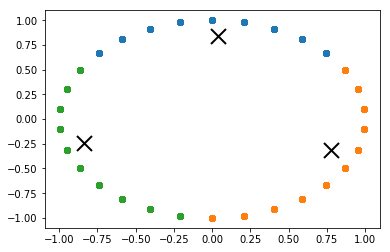

In [146]:
centroids=kmeansshow(3,new_df_month[['x', 'y']].values)


In [150]:
centroids

array([[ 0.03677862,  0.8394551 ],
       [ 0.77748002, -0.31072461],
       [-0.83653548, -0.23709482]])

In [178]:
centroids
newGroupList = []
for i in range(len(new_df)):
    new_group = {"userid":0,"color":"","num_gropp":0,"day":0}
#     print(str(new_df_month['x'][i])+","+str(new_df_month['y'][i]))
    if float(new_df_month['x'][i]) >= -1.00 and float(new_df_month['x'][i]) <= -0.26 and float(new_df_month['y'][i]) >= -1.00 and float(new_df_month['y'][i]) <= 0.50 :
        new_group["userid"] = new_df_month['userid'][i]
        new_group["color"] = "green"
        new_group["num_gropp"] = 0
        new_group["day"] = new_df_month['day'][i]
    elif float(new_df_month['x'][i]) >= -0.73 and float(new_df_month['x'][i]) <= 0.73 and float(new_df_month['y'][i]) >= 0.60 and float(new_df_month['y'][i]) <= 0.99:
        new_group["userid"] = new_df_month['userid'][i]
        new_group["color"] = "blue"
        new_group["num_gropp"] = 1
        new_group["day"] = new_df_month['day'][i]
    elif float(new_df_month['x'][i]) >= 0.00 and float(new_df_month['x'][i]) <= 0.79 and float(new_df_month['y'][i]) >= -1.00 and float(new_df_month['y'][i]) <= 0.50:
        new_group["userid"] = new_df_month['userid'][i]
        new_group["color"] = "orange"
        new_group["num_gropp"] = 2
        new_group["day"] = new_df_month['day'][i]
    newGroupList.append(new_group)

In [205]:
x = np.random.random(13876)
print(x)
km = KMeans()
m =km.fit(df_group ['day'].values.reshape(-1,1))
print(m)


[0.92494537 0.80034999 0.91726001 ... 0.57972211 0.33148782 0.62207887]
KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=8, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)


In [193]:
df_group = pd.DataFrame(columns = ['day','color','num_group','userid'])
for i in newGroupList :
#     print(i['color'])
    if i['color'] !="":
        df_group.loc[len(df_group)] = [i['day'],i['color'],i['num_gropp'],i['userid']]


In [196]:
df_group.head()
labels2 = df_group['num_group'].unique().tolist()


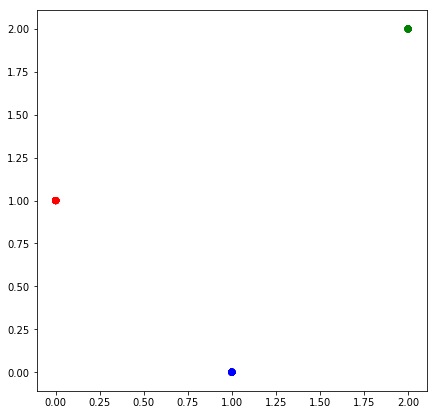

In [217]:
df_group['labels'] = kmeans.fit_predict(df_group[['num_group']])
# f1 = df_value['value'].values
# f2 = df_value['uid'].values
# X = new_df[['hour', 'minute']].values
X = df_group[['day', 'labels']].values
# Set a 3 KMeans clustering
kmeans = KMeans(n_clusters=3)
# X = kmeans.fit(df_group ['day'].values.reshape(-1,1))
# Compute cluster centers and predict cluster indices
# X_clustered = kmeans.fit_predict(X)
# hpc = PCA(n_components=2).fit_transform(X)
# k_means = KMeans()
# k_means.fit(hpc)


# km = KMeans()
# km.fit(x.reshape(-1,1)) 

kmeans = kmeans.fit(df_group ['num_group'].values.reshape(-1,1)) 
X_clustered = kmeans.fit_predict(X)

# kmeans = KMeans(n_clusters=3)
# # Fitting the input data
# kmeans = kmeans.fit(X)
# # Getting the cluster labels
# labels = kmeans.predict(X)


# Define our own color map
LABEL_COLOR_MAP = {0 : 'r',1 : 'g',2 : 'b'}
label_color = [LABEL_COLOR_MAP[l] for l in X_clustered]

# Plot the scatter digram
plt.figure(figsize = (7,7))
plt.scatter(X[:,0],X[:,1], c= label_color, alpha=0.5) 
# plt.xlabel('user_id' ,fontsize=18)
# plt.ylabel('amount of order' ,fontsize=18)

plt.show()

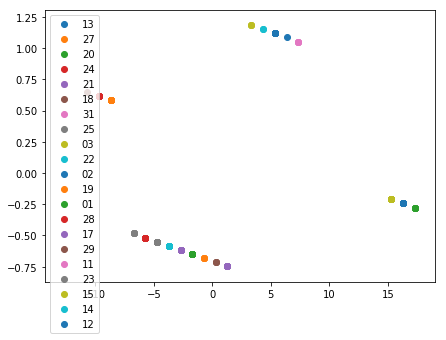

In [260]:
labels2 = df_group['num_group'].unique().tolist()

X=df_group[['num_group', 'day']].values
pca = PCA(n_components=2)
pca.fit(X)
X_ = pca.transform(X)
dfPCA = pd.DataFrame({'x1': X_[:,0], 'x2': X_[:,1]})
dfPCA['day'] = df_group['day']
dfPCA

plt.figure(figsize=(7,5))
for lab in labels2:
#     print(lab)
    plt.scatter(dfPCA.loc[dfPCA['day'] == lab, 'x1'],  dfPCA.loc[dfPCA['day'] == lab, 'x2'], label=lab)
    plt.legend()

In [241]:
# df_group['num_group'].value_counts()
# df_group['day'].value_counts()
df_group.groupby(['userid'])['num_group'].sum()
df_group_sort = df_group.sort_values(by=['num_group'])

In [344]:
df_group_sort.head()

,day,color,num_group,userid,labels
169,25,green,0,424.0,1
153,20,green,0,297.0,1
154,20,green,0,336.0,1
105,22,green,0,307.0,1
71,20,green,0,206.0,1


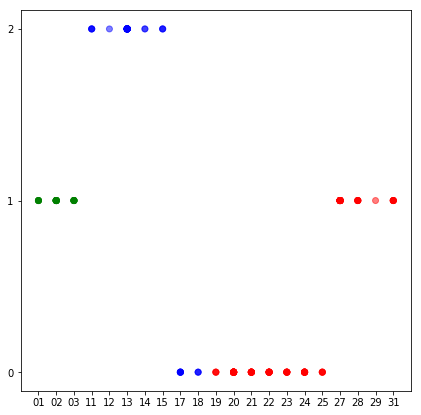

In [221]:
f1 = df_group['num_group'].values
f2 = df_group['day'].values
X = np.array(list(zip(f2,f1)))
# X=df_group[['num_group', 'day']].values
# Set a 3 KMeans clustering
kmeans = KMeans(n_clusters=3)
# Compute cluster centers and predict cluster indices
X_clustered = kmeans.fit_predict(X)

# Define our own color map
LABEL_COLOR_MAP = {0 : 'r',1 : 'g',2 : 'b'}
label_color = [LABEL_COLOR_MAP[l] for l in X_clustered]

# Plot the scatter digram
plt.figure(figsize = (7,7))
plt.scatter(X[:,0],X[:,1], c= label_color, alpha=0.5) 
# plt.xlabel('user_id' ,fontsize=18)
# plt.ylabel('amount of order' ,fontsize=18)

plt.show()

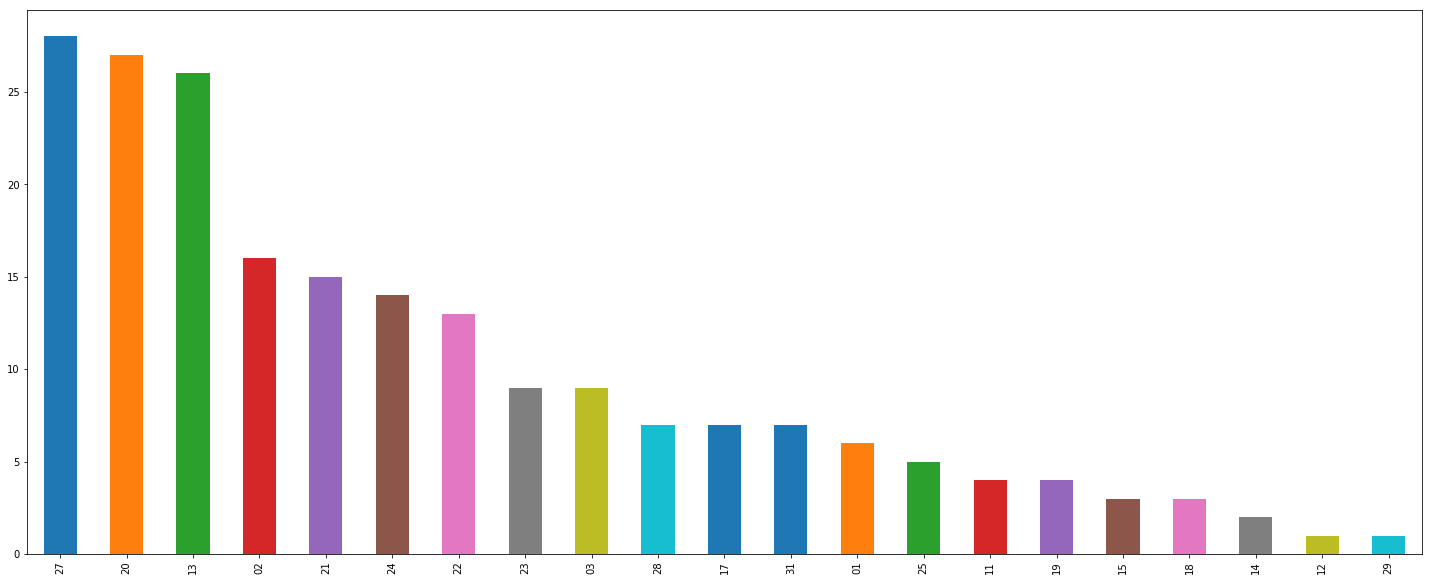

In [252]:
# plt.figure(figsize = (20,20))
# df_temp_drop=df_temp_drop.drop(['labels',],1)

# df_temp_drop.plot(style='.-', markevery=5,figsize = (10,7))
# plt.xlabel('hour (s)', fontsize=18)
# plt.ylabel('amount of session' ,fontsize=18)
# plt.xticks(size = 18)
# plt.yticks(size = 18)
# plt.show()
# df_temp_drop.head()
# df_temp_drop.plot(x='num_group', y='day')

t = df_temp_drop['day'].value_counts()
from pylab import rcParams
rcParams['figure.figsize'] = 25, 10


ax= t.plot.bar()
# plt.xlabel('hour (s)', fontsize=18)
# ax.set_ylabelticks(fontsize=18)
# ax.set_ylabel("amount of orders",fontsize=12)



In [266]:
df_group.head()
# df5.to_csv('cluster_time2.csv', encoding='utf-8', index=False)

,day,color,num_group,userid,labels
0,13,orange,2,181.0,2
1,27,blue,1,173.0,0
2,13,orange,2,185.0,2
3,13,orange,2,82.0,2
4,20,green,0,49.0,1


In [285]:
df_info.head()

,id,age,birthdate,sex,salary,size,breakfast,lunch,dinner,late,...,shabu,grill,steak,fastfood,cake,dessert,coffee,juice,created_at,user_id
0,1,21,1996-07-19,male,"น้อยกว่า 10,000",fit,f,t,t,f,...,f,f,t,t,t,t,f,t,2018-02-12 10:15:15.007524+00,4
1,2,20,1998-02-13,female,"น้อยกว่า 10,000",thin,f,t,t,t,...,f,f,f,t,t,f,f,f,2018-02-18 04:35:55.301258+00,23
2,3,22,1995-10-15,female,"น้อยกว่า 10,000",fat,f,t,t,f,...,f,f,t,t,f,t,f,t,2018-02-19 10:21:34.195126+00,29
3,4,19,1999-02-09,male,"น้อยกว่า 10,000",chubby,t,t,t,f,...,f,f,f,f,f,t,t,t,2018-02-19 11:03:40.193844+00,30
4,5,18,1999-05-05,female,"น้อยกว่า 10,000",fat,t,t,t,t,...,f,f,t,t,t,t,f,t,2018-02-19 11:11:51.049498+00,31


In [342]:
from scipy import stats

df_temp = df_info
pd.get_dummies(df_temp, columns=['size'])
df_tr_std = stats.zscore(df_tr[clmns])



,id,age,birthdate,sex,salary,breakfast,lunch,dinner,late,taste,...,cake,dessert,coffee,juice,created_at,user_id,size_chubby,size_fat,size_fit,size_thin
0,1,21,1996-07-19,male,"น้อยกว่า 10,000",f,t,t,f,t,...,t,t,f,t,2018-02-12 10:15:15.007524+00,4,0,0,1,0
1,2,20,1998-02-13,female,"น้อยกว่า 10,000",f,t,t,t,t,...,t,f,f,f,2018-02-18 04:35:55.301258+00,23,0,0,0,1
2,3,22,1995-10-15,female,"น้อยกว่า 10,000",f,t,t,f,t,...,f,t,f,t,2018-02-19 10:21:34.195126+00,29,0,1,0,0
3,4,19,1999-02-09,male,"น้อยกว่า 10,000",t,t,t,f,t,...,f,t,t,t,2018-02-19 11:03:40.193844+00,30,1,0,0,0
4,5,18,1999-05-05,female,"น้อยกว่า 10,000",t,t,t,t,t,...,t,t,f,t,2018-02-19 11:11:51.049498+00,31,0,1,0,0
5,6,19,1998-07-01,female,"น้อยกว่า 10,000",f,f,t,t,t,...,f,t,f,t,2018-02-19 14:45:47.380248+00,32,0,1,0,0
6,7,20,1998-01-01,female,"น้อยกว่า 10,000",t,t,t,f,t,...,f,f,f,f,2018-02-20 01:44:25.556931+00,36,1,0,0,0
7,8,19,1999-01-14,female,"น้อยกว่า 10,000",f,t,t,f,t,...,t,t,t,t,2018-02-20 08:32:12.79581+00,39,0,0,1,0
8,9,21,1996-03-22,male,"10,000-19,999",t,t,t,t,t,...,t,t,t,t,2018-02-20 13:56:40.167276+00,46,1,0,0,0
9,10,19,1998-11-02,male,"น้อยกว่า 10,000",t,t,t,t,t,...,t,t,t,t,2018-02-20 14:21:37.204224+00,48,0,1,0,0


In [327]:
# size={'thin':0,'fit':1,'chubby':2,'fat':3}
# salary={'น้อยกว่า 10,000':0,'10,000-19,999':1,'20,000-29,999':2,'30,000-39,999':3,
# '40,000-49,999':4,'50,000 ขึ้นไป':5}
df_info = pd.read_csv('CSV2.csv')
df_info.head()
temp = df_info[df_info['user_id'] == 4]
temp["size"]
print("ddd", temp["salary"][0])
# print("aa",temp.loc["size"])

df_order_info = pd.DataFrame(columns = ['day','num_group','salary','size','userid'])
for i in range(len(df_group)):
    size = -1
    salary = -1

    temp = df_info[df_info['user_id'] == int(df_group['userid'][i])]
    if temp.empty:
        pass

    else:
#         print(temp["size"])
#         print(type(temp["size"].values[0]))
#         print(temp["size"][0].values)
        if temp["size"].values[0]=="thin":
            size = 0
        elif temp["size"].values[0] =="fit":
            size = 1
        elif temp["size"].values[0]=="chubby":
            size = 2
        elif temp["size"].values[0] =="fat":
            size = 3
        if temp["salary"].values[0] =="น้อยกว่า 10,000":
            salary = 0
        elif temp["salary"].values[0] =="10,000-19,999":
            salary = 1
        elif temp["salary"].values[0]=="20,000-29,999":
            salary = 2
        elif temp["salary"].values[0] =="30,000-39,999":
            salary = 3
        elif temp["salary"].values[0] =="40,000-49,999":
            salary = 4
        elif temp["salary"].values[0] =="50,000 ขึ้นไป":
            salary = 5
        df_order_info.loc[len(df_order_info)] = [df_group['day'][i],df_group['num_group'][i],salary,size,df_group['userid'][i]]

#     print(i['color'])
#     if i['color'] !="":
        

ddd น้อยกว่า 10,000


In [343]:
df_order_info
df_order_info_sort = df_order_info.sort_values(by=['num_group'])
# df_order_info_sort

In [341]:
df_order_info_sort.plot.bar
# a = df_order_info_sort.groupby('num_group')['size'].count()
a =df_order_info_sort.groupby(["num_group", "size"])[['num_group','size']].count()
a
# day_of_weeks_sum = df.groupby('day_of_week').value_counts()

num_group  size
num_group size                 
0         0             3     3
          1             8     8
          3             3     3
1         0             2     2
          1             5     5
          2            10    10
          3             4     4
2         0             1     1
          1             6     6
          2             3     3
          3             2     2

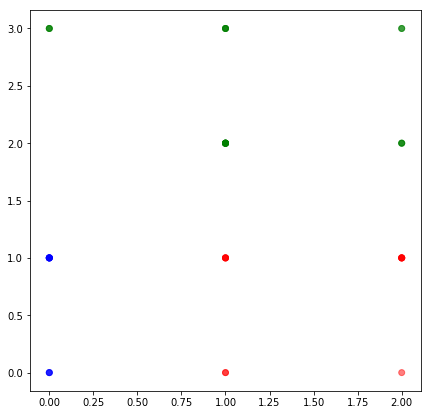

In [329]:
แ

30
Estimated number of clusters: 30
Silhouette Coefficient: 1.000


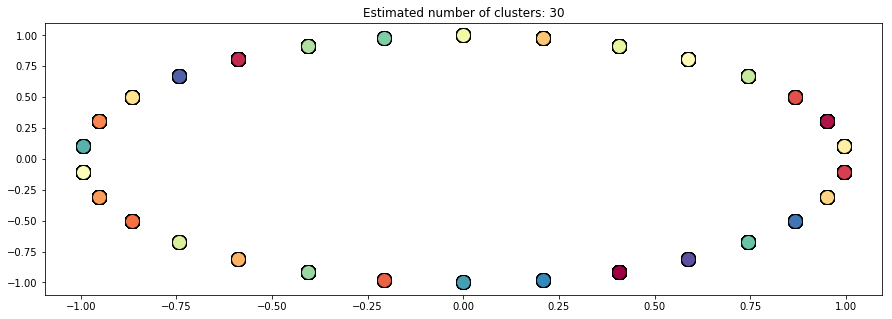

In [142]:
# f1 = df_value['value'].values
# f2 = df_value['uid'].values
# X = np.array(list(zip(f1,f2)))
# X = np.array(list(zip(f2,f2)))
X=new_df_month[['x', 'y']].values
# X = np.array(list(zip(f2,f3)))
# X = np.array(list(zip(f1, f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15)))
# X = df2['age'].values
# print(X)
# X, labels_true = make_blobs(X, centers=centers, cluster_std=0.4,random_state=0)
# X = StandardScaler().fit_transform(new_df_month[['x', 'y']].values)

db = DBSCAN(eps=0.2, min_samples=10).fit(X)
# print(db)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
# print(core_samples_mask)
core_samples_mask[db.core_sample_indices_] = True
# print(core_samples_mask)
labels = db.labels_

n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
print(n_clusters_)

print('Estimated number of clusters: %d' % n_clusters_)
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, labels))

# #############################################################################
# Plot result
import matplotlib.pyplot as plt
plt.figure(figsize=(15,5))

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)
#     print(class_member_mask)
    xy = X[class_member_mask & core_samples_mask]
#     print(xy)
#     new_df_month['plot1_x'] =xy
#     new_df_month['plot1_y'] =xy
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = X[class_member_mask & ~core_samples_mask]
#     new_df_month['plot2_x'] =xy
#     new_df_month['plot2_y'] =xy
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

# plt.figure(figsize = (7,7))
plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

5
Estimated number of clusters: 5
Silhouette Coefficient: 0.276


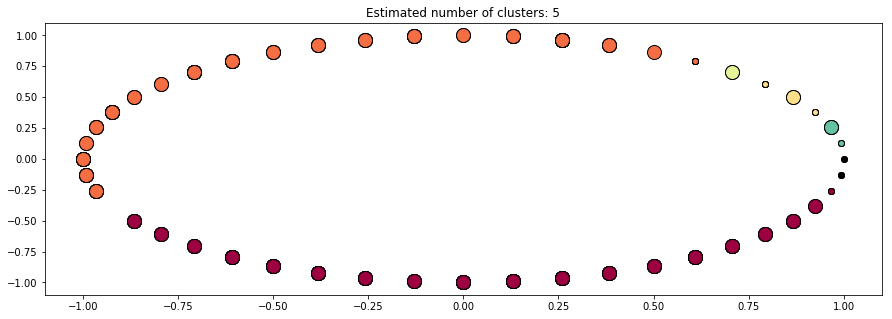

In [116]:
# f1 = df_value['value'].values
# f2 = df_value['uid'].values
# X = np.array(list(zip(f1,f2)))
# X = np.array(list(zip(f2,f2)))
X=new_df[['x', 'y']].values
# X = np.array(list(zip(f2,f3)))
# X = np.array(list(zip(f1, f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15)))
# X = df2['age'].values
# print(X)
# X, labels_true = make_blobs(X, centers=centers, cluster_std=0.4,random_state=0)
# X = StandardScaler().fit_transform(new_df[['x', 'y']].values)

db = DBSCAN(eps=0.2, min_samples=10).fit(X)
# print(db)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
# print(core_samples_mask)
core_samples_mask[db.core_sample_indices_] = True
# print(core_samples_mask)
labels = db.labels_

n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
print(n_clusters_)

print('Estimated number of clusters: %d' % n_clusters_)
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, labels))

# #############################################################################
# Plot result
import matplotlib.pyplot as plt
plt.figure(figsize=(15,5))

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)
#     print(class_member_mask)
    xy = X[class_member_mask & core_samples_mask]
#     print(xy)
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

# plt.figure(figsize = (7,7))
plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

In [111]:
unique_labels

{-1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10}

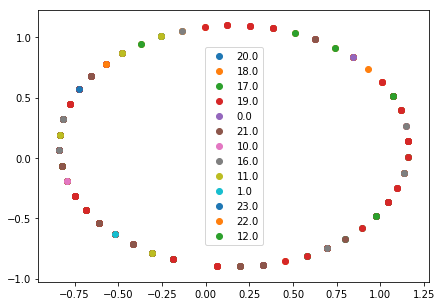

In [102]:

X=new_df[['x', 'y']].values
pca = PCA(n_components=2)
pca.fit(X)
X_ = pca.transform(X)
dfPCA = pd.DataFrame({'x1': X_[:,0], 'x2': X_[:,1]})
dfPCA['hour'] = new_df['hour']
dfPCA

plt.figure(figsize=(7,5))
for lab in labels:
#     print(lab)
    plt.scatter(dfPCA.loc[dfPCA['hour'] == lab, 'x1'],  dfPCA.loc[dfPCA['hour'] == lab, 'x2'], label=lab)
    plt.legend()

In [99]:
labels = new_df['hour'].unique().tolist()
labels

[20.0, 18.0, 17.0, 19.0, 0.0, 21.0, 10.0, 16.0, 11.0, 1.0, 23.0, 22.0, 12.0]

7
Estimated number of clusters: 7
Silhouette Coefficient: -0.124


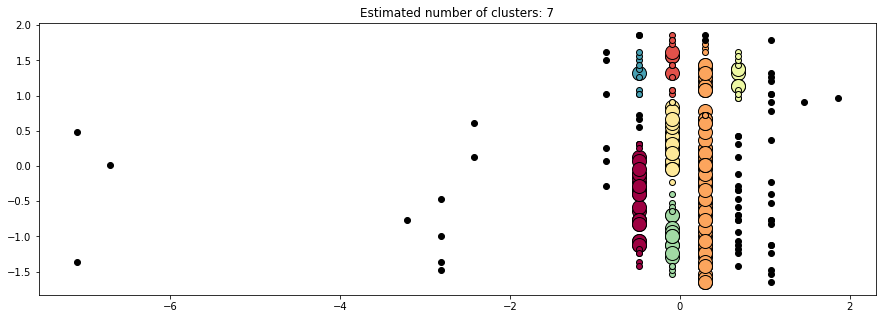

In [91]:
# f1 = df_value['value'].values
# f2 = df_value['uid'].values
# X = np.array(list(zip(f1,f2)))
# X = np.array(list(zip(f2,f2)))

# X = np.array(list(zip(f2,f3)))
# X = np.array(list(zip(f1, f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15)))
# X = df2['age'].values
# print(X)
# X, labels_true = make_blobs(X, centers=centers, cluster_std=0.4,random_state=0)
X = StandardScaler().fit_transform(new_df[['hour', 'minute']].values)

db = DBSCAN(eps=0.3, min_samples=10).fit(X)
# print(db)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
# print(core_samples_mask)
core_samples_mask[db.core_sample_indices_] = True
# print(core_samples_mask)
labels = db.labels_

n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
print(n_clusters_)

print('Estimated number of clusters: %d' % n_clusters_)
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, labels))

# #############################################################################
# Plot result
import matplotlib.pyplot as plt
plt.figure(figsize=(15,5))

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

# plt.figure(figsize = (7,7))
plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

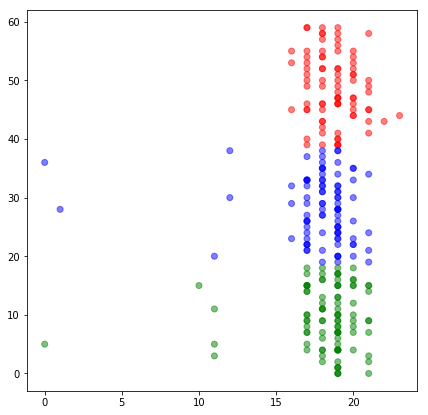

In [92]:
# f1 = df_value['value'].values
# f2 = df_value['uid'].values
X = new_df[['hour', 'minute']].values
# Set a 3 KMeans clustering
kmeans = KMeans(n_clusters=3)
# Compute cluster centers and predict cluster indices
X_clustered = kmeans.fit_predict(X)

# Define our own color map
LABEL_COLOR_MAP = {0 : 'r',1 : 'g',2 : 'b'}
label_color = [LABEL_COLOR_MAP[l] for l in X_clustered]

# Plot the scatter digram
plt.figure(figsize = (7,7))
plt.scatter(X[:,0],X[:,1], c= label_color, alpha=0.5) 
# plt.xlabel('user_id' ,fontsize=18)
# plt.ylabel('amount of order' ,fontsize=18)

plt.show()

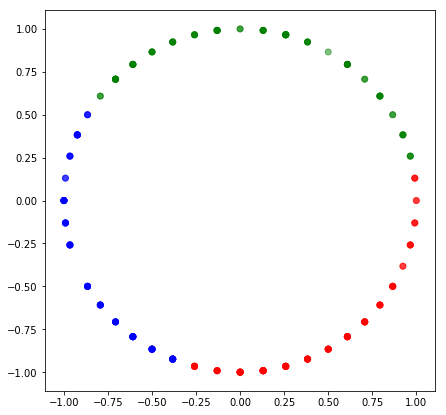

In [87]:
# f1 = df_value['value'].values
# f2 = df_value['uid'].values
X = new_df[['x', 'y']].values
# Set a 3 KMeans clustering
kmeans = KMeans(n_clusters=3)
# Compute cluster centers and predict cluster indices
X_clustered = kmeans.fit_predict(X)

# Define our own color map
LABEL_COLOR_MAP = {0 : 'r',1 : 'g',2 : 'b'}
label_color = [LABEL_COLOR_MAP[l] for l in X_clustered]

# Plot the scatter digram
plt.figure(figsize = (7,7))
plt.scatter(X[:,0],X[:,1], c= label_color, alpha=0.5) 
# plt.xlabel('user_id' ,fontsize=18)
# plt.ylabel('amount of order' ,fontsize=18)

plt.show()

In [133]:
# from datetime import datetime, timedelta

# d = datetime.today() - timedelta(days=days_to_subtract)
# df_time = pd.to_datetime(df2["created_atc"])
# day  = df_time.dt.day
# date = df_time.dt.date
# hour = df_time.dt.hour
# df2['hourc'] = hour

AttributeError: 'datetime.datetime' object has no attribute 'to_datetime'

In [149]:
from datetime import datetime, timedelta

# df3['created_atc']=df3['created_at'].dt.tz_localize('UTC').dt.tz_convert('Asia/Bangkok')
# df_order_time = pd.to_datetime(df3["created_atc"])
today = datetime.strptime(df3["created_atc"][0], '%Y-%m-%d')
# yesterday = today - timedelta(days=1)


# dt = date.today() - timedelta(5)

TypeError: strptime() argument 1 must be str, not Timestamp

In [152]:
df3["created_atc"][0]

Timestamp('2018-03-09 19:40:49.597613+0700', tz='Asia/Bangkok')

In [150]:
today

NameError: name 'today' is not defined

In [144]:
df_order_time
# order_date = df_order_time.dt.day

In [147]:
order_date[0]
from datetime import datetime, timedelta

d = datetime.today() - timedelta(days=df3["created_atc"][0])
print(d)

TypeError: unsupported type for timedelta days component: Timestamp

In [143]:
datetime.today()

datetime.datetime(2018, 5, 5, 17, 59, 34, 895303)

In [153]:
df3.head()

,id,menu,amount,date,address,total,phone_number,slip_payment,delivery_charge,payment_method,coupon,created_at,store_id,user_id,morethings,status,isSuccess,created_atc
0,181,{184},{1},2018-03-09 12:40:49.596791+00,หอ C10,55,"""0958171957""",NaN,10,จ่ายเงินปลายทาง,NaN,2018-03-09 12:40:49.597613,1,96,NaN,กำลังส่ง,t,2018-03-09 19:40:49.597613+07:00
1,193,"{199,242}","{1,1}",2018-03-11 12:24:20.207649+00,หอ C-6,75,"""0908390241""",NaN,10,จ่ายเงินปลายทาง,NaN,2018-03-11 12:24:20.208554,1,134,NaN,กำลังส่ง,t,2018-03-11 19:24:20.208554+07:00
2,173,"{""('345', '351', '356')""}",{1},2018-03-08 10:22:43.757011+00,หอ M0826639206,164,"""0826639206""",slip_payment/2018/03/08/28927819_7665739802003...,25,พร้อมเพย์,NaN,2018-03-08 10:22:43.758131,24,18,NaN,กำลังส่ง,t,2018-03-08 17:22:43.758131+07:00
3,48,{249},{4},2018-02-16 10:32:47+00,หอ C1,150,"""0826639206""",slip_payment/2018/02/16/IMG_20180214_231936247...,10,พร้อมเพย์,NaN,2018-02-16 10:32:47.663227,1,18,NaN,กำลังส่ง,t,2018-02-16 17:32:47.663227+07:00
4,47,{240},{2},2018-02-16 10:27:10+00,หอ C6,75,"""097-0788305""",slip_payment/2018/02/16/IMG_20180214_231936247...,5,พร้อมเพย์,NaN,2018-02-16 10:27:10.620342,1,18,NaN,กำลังส่ง,t,2018-02-16 17:27:10.620342+07:00


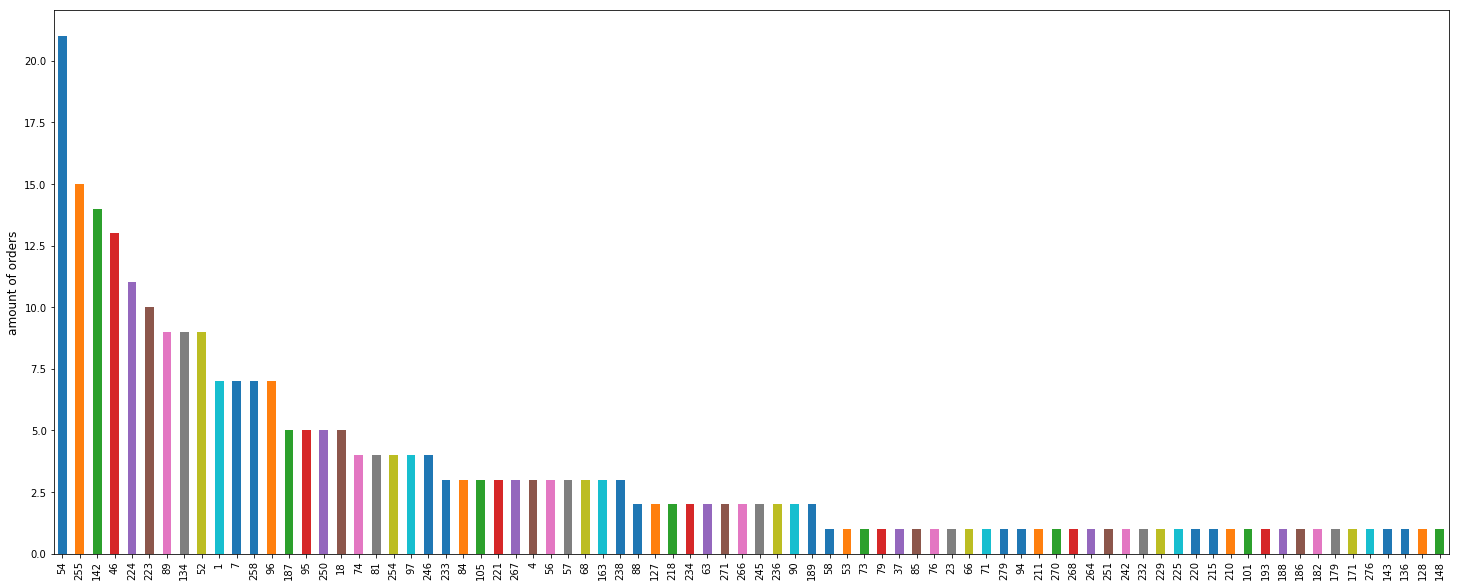

In [116]:
t = df3['user_id'].value_counts()
from pylab import rcParams
rcParams['figure.figsize'] = 25, 10


ax= t.plot.bar()
ax.set_ylabel("amount of orders",fontsize=12)



# for i in ax.patches:
# #     # get_x pulls left or right; get_height pushes up or down
#     ax.text(i.get_x()+.12, i.get_height()-3, \
#             str(round((i.get_height())*100, 2))+'%', fontsize=22,
#                 color='blue')
plt.show()

# t.plot.bar()
# for i in ax.patches:
#     # get_x pulls left or right; get_height pushes up or down
#     ax.text(i.get_x()+.12, i.get_height()-3, \
#             str(round((i.get_height()/total)*100, 2))+'%', fontsize=22,
#                 color='white')

In [ ]:
f1 = df_value['value'].values
f2 = df_value['uid'].values
X = np.array(list(zip(f1,f2)))
# X = np.array(list(zip(f2,f2)))

# X = np.array(list(zip(f2,f3)))
# X = np.array(list(zip(f1, f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15)))
# X = df2['age'].values
# print(X)
# X, labels_true = make_blobs(X, centers=centers, cluster_std=0.4,random_state=0)
X = StandardScaler().fit_transform(X)

db = DBSCAN(eps=0.3, min_samples=10).fit(X)
# print(db)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
# print(core_samples_mask)
core_samples_mask[db.core_sample_indices_] = True
# print(core_samples_mask)
labels = db.labels_

n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
print(n_clusters_)

print('Estimated number of clusters: %d' % n_clusters_)
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, labels))

# #############################################################################
# Plot result
import matplotlib.pyplot as plt
plt.figure(figsize=(15,5))

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

# plt.figure(figsize = (7,7))
plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


2
Estimated number of clusters: 2
Silhouette Coefficient: 0.179


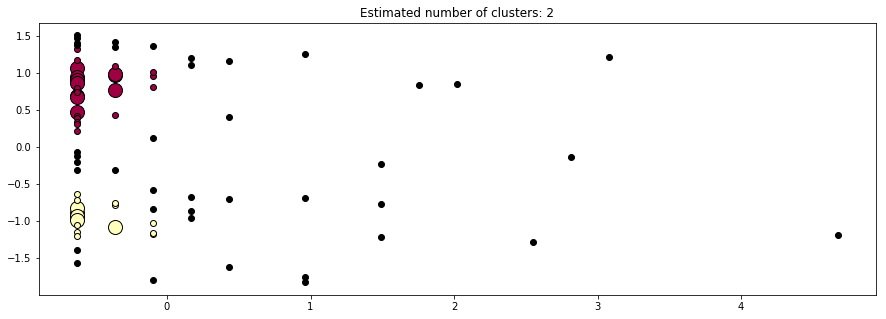

In [100]:
f1 = df_value['value'].values
f2 = df_value['uid'].values
X = np.array(list(zip(f1,f2)))
# X = np.array(list(zip(f2,f2)))

# X = np.array(list(zip(f2,f3)))
# X = np.array(list(zip(f1, f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15)))
# X = df2['age'].values
# print(X)
# X, labels_true = make_blobs(X, centers=centers, cluster_std=0.4,random_state=0)
X = StandardScaler().fit_transform(X)

db = DBSCAN(eps=0.3, min_samples=10).fit(X)
# print(db)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
# print(core_samples_mask)
core_samples_mask[db.core_sample_indices_] = True
# print(core_samples_mask)
labels = db.labels_

n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
print(n_clusters_)

print('Estimated number of clusters: %d' % n_clusters_)
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, labels))

# #############################################################################
# Plot result
import matplotlib.pyplot as plt
plt.figure(figsize=(15,5))

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

# plt.figure(figsize = (7,7))
plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()


In [54]:
dfsort = df3.sort_values('user_id')

In [55]:
df_uid = dfsort['user_id']
t = dfsort['user_id'].value_counts()

In [67]:
list_id=list(dfsort['user_id'].values)
list_2 = list(dfsort['user_id'].value_counts())

In [82]:
# list_id

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 4,
 4,
 4,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 18,
 18,
 18,
 18,
 18,
 23,
 37,
 46,
 46,
 46,
 46,
 46,
 46,
 46,
 46,
 46,
 46,
 46,
 46,
 46,
 52,
 52,
 52,
 52,
 52,
 52,
 52,
 52,
 52,
 53,
 54,
 54,
 54,
 54,
 54,
 54,
 54,
 54,
 54,
 54,
 54,
 54,
 54,
 54,
 54,
 54,
 54,
 54,
 54,
 54,
 54,
 56,
 56,
 56,
 57,
 57,
 57,
 58,
 63,
 63,
 66,
 68,
 68,
 68,
 71,
 73,
 74,
 74,
 74,
 74,
 76,
 79,
 81,
 81,
 81,
 81,
 84,
 84,
 84,
 85,
 88,
 88,
 89,
 89,
 89,
 89,
 89,
 89,
 89,
 89,
 89,
 90,
 90,
 94,
 95,
 95,
 95,
 95,
 95,
 96,
 96,
 96,
 96,
 96,
 96,
 96,
 97,
 97,
 97,
 97,
 101,
 105,
 105,
 105,
 127,
 127,
 128,
 134,
 134,
 134,
 134,
 134,
 134,
 134,
 134,
 134,
 136,
 142,
 142,
 142,
 142,
 142,
 142,
 142,
 142,
 142,
 142,
 142,
 142,
 142,
 142,
 143,
 148,
 163,
 163,
 163,
 171,
 179,
 182,
 186,
 187,
 187,
 187,
 187,
 187,
 188,
 189,
 189,
 193,
 210,
 211,
 215,
 218,
 218,
 220,
 221,
 221,
 221,
 223,
 223,
 223,
 223,
 223,
 223

In [85]:
dfsort['user_id'].value_counts()
len(dfsort['user_id'].value_counts())

80

In [87]:
# list_2
dfc = pd.DataFrame( dfsort['user_id'].value_counts())
df_value = pd.DataFrame(columns=['uid','value'], index=range(len(dfsort['user_id'].value_counts())))

In [95]:
# dfc

In [94]:
dfc.user_id.values[0]

21

In [96]:
# df_uid
# lst = []
# for i in
# # t
# dfc.user_id.values[0]
# dfc.index.values[0]
for i in range(len(dfc.index)):
#     for a in range(2):
    df_value.loc[i].uid = dfc.index[i]
    df_value.loc[i].value = dfc.user_id.values[i]

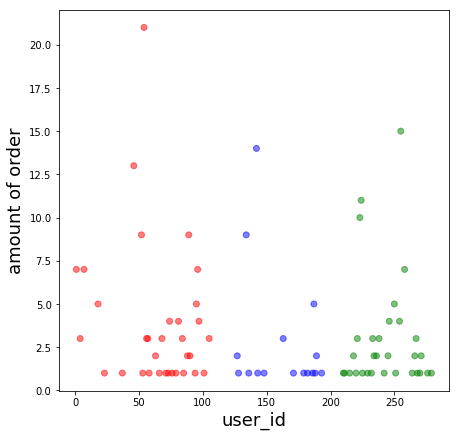

In [115]:
f1 = df_value['value'].values
f2 = df_value['uid'].values
X = np.array(list(zip(f2,f1)))
# Set a 3 KMeans clustering
kmeans = KMeans(n_clusters=3)
# Compute cluster centers and predict cluster indices
X_clustered = kmeans.fit_predict(X)

# Define our own color map
LABEL_COLOR_MAP = {0 : 'r',1 : 'g',2 : 'b'}
label_color = [LABEL_COLOR_MAP[l] for l in X_clustered]

# Plot the scatter digram
plt.figure(figsize = (7,7))
plt.scatter(X[:,0],X[:,1], c= label_color, alpha=0.5) 
plt.xlabel('user_id' ,fontsize=18)
plt.ylabel('amount of order' ,fontsize=18)

plt.show()

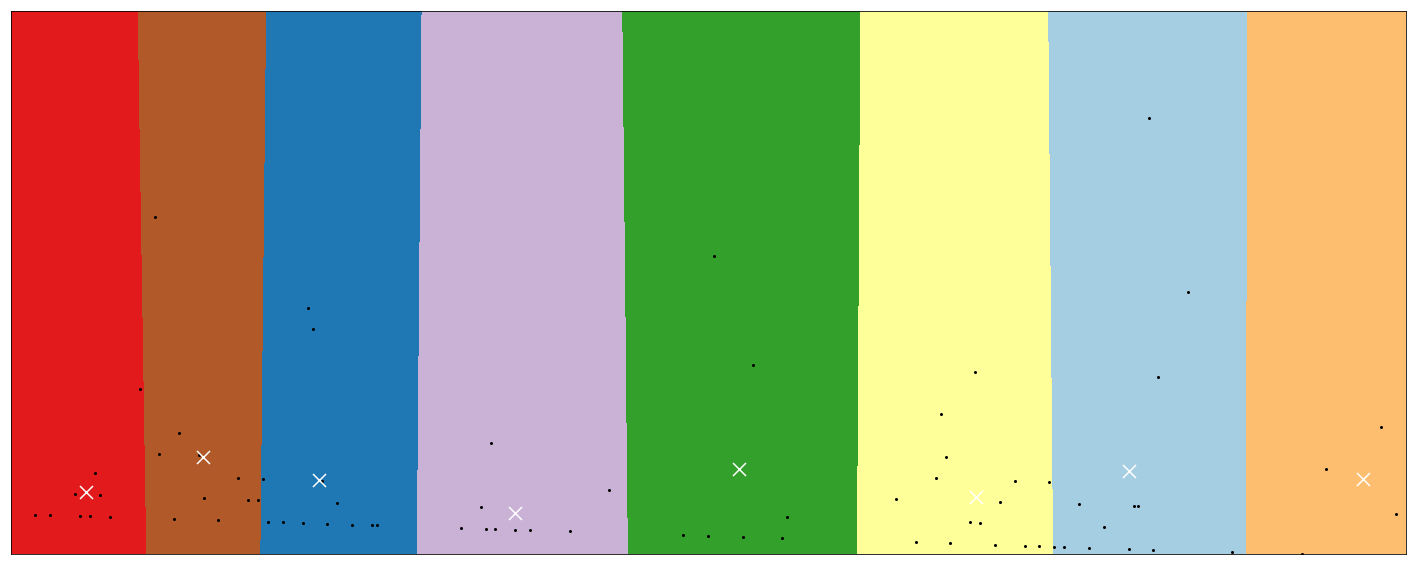

In [102]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA
# df_value
f1 = df_value['value'].values
f2 = df_value['uid'].values
X = np.array(list(zip(f1,f2)))

hpc = PCA(n_components=2).fit_transform(X)
k_means = KMeans()
k_means.fit(hpc)

x_min, x_max = hpc[:, 0].min() - 5, hpc[:, 0].max() - 1
y_min, y_max = hpc[:, 1].min(), hpc[:, 1].max() + 5
xx, yy = np.meshgrid(np.arange(x_min, x_max, .02), np.arange(y_min, y_max, .02))
Z = k_means.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation='nearest',
          extent=(xx.min(), xx.max(), yy.min(), yy.max()),
          cmap=plt.cm.Paired,
          aspect='auto', origin='lower')

plt.plot(hpc[:, 0], hpc[:, 1], 'k.', markersize=4)
centroids = k_means.cluster_centers_
inert = k_means.inertia_
plt.scatter(centroids[:, 0], centroids[:, 1],
           marker='x', s=169, linewidths=3,
           color='w', zorder=8)
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

In [ ]:
activity_duration = df3_drop2.groupby('hourc')['actionc'].sum()
day_of_weeks_sum = df.groupby('day_of_week').value_counts()

# Session


In [62]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.decomposition import PCA # Principal Component Analysis module
from sklearn.cluster import KMeans # KMeans clustering 
import matplotlib.pyplot as plt # Python defacto plotting library
import seaborn as sns # More snazzy plotting library
%matplotlib inline 
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets.samples_generator import make_blobs
from sklearn.preprocessing import StandardScaler

df = pd.read_csv('session_csv.csv') # reads the csv and creates the dataframe called movie
df.head(n=2)
df2=df.drop(['id','user_id','value'],1)
action = {'enter':0,'enter_store':1,'เพิ่มเข้าตะกร้า':2,'สั่งอาหาร':3,'search_cate':4,
          'search_input':5,'กรอกประวัติความหิว':6,'like':7,'ใช้โค้ด':8,'click recommended menu':9,'click_genetic_rec':10,'click recommended menues':11}


for k,i in df2.iterrows():
    if i['action']==i['action']:
        df2.loc[k,"actionc"]=action[i['action']]
   

In [140]:
df.head()

,id,action,value,created_at,user_id
0,1144,enter,home,2018-02-21 08:30:45.169158+00,52
1,1148,enter,home,2018-02-21 10:07:01.98235+00,52
2,1152,เพิ่มเข้าตะกร้า,แกงส้ม+ไข่เจียว,2018-02-21 10:10:14.041527+00,52
3,1160,สั่งอาหาร,76,2018-02-21 10:15:29.73492+00,52
4,411,enter,home,2018-02-16 10:25:31.747361+00,18


In [75]:
from datetime import datetime, timedelta

df['created_at'] = pd.to_datetime(df["created_at"])
df['created_atc']=df['created_at'].dt.tz_localize('UTC').dt.tz_convert('Asia/Bangkok')
df_time = pd.to_datetime(df["created_atc"])
# df['created_atc']=df['created_at'].dt.tz_localize('UTC').dt.tz_convert('Asia/Bangkok')
date = df_time.value_counts().keys().tolist()
ourdates2 = pd.to_datetime(date, format='%d/%b/%Y:%H:%M:%S')
print(type(ourdates))
list_date2 = []
for i in ourdates2:
    e =  i.strftime('%Y-%m-%d %H:%M:%S')
    list_date2.append(e)

<class 'pandas.core.indexes.datetimes.DatetimeIndex'>


In [79]:
# df3['created_atc']
new_df_session = pd.DataFrame(columns = ['hour','minute','hourfloat','x','y'])
for i in list_date2 :
    temp = i.split(' ')
    temp2 = temp[1].split(':')
    
    hourfloat = (int(temp2[0])+int(temp2[1]))/2.0
    x=np.sin(2.*np.pi*hourfloat/24.)
    y=np.cos(2.*np.pi*hourfloat/24.)

    new_df_session.loc[len(new_df_session)] = [int(temp2[0]), int(temp2[1]),hourfloat,x,y]

In [81]:
# new_df_session

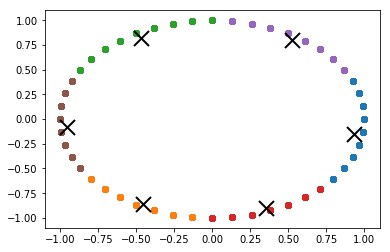

array([[ 0.93069374, -0.15217278],
       [-0.45540096, -0.85587312],
       [-0.46542858,  0.82261538],
       [ 0.35160523, -0.90112194],
       [ 0.52194113,  0.80225703],
       [-0.95260802, -0.08270818]])

In [83]:
kmeansshow(6,new_df_session[['x', 'y']].values)


In [89]:
# f1 = df_value['value'].values
# f2 = df_value['uid'].values
# X = np.array(list(zip(f1,f2)))
# X = np.array(list(zip(f2,f2)))

# X = np.array(list(zip(f2,f3)))
# X = np.array(list(zip(f1, f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15)))
# X = df2['age'].values
# print(X)
# X, labels_true = make_blobs(X, centers=centers, cluster_std=0.4,random_state=0)
# X = StandardScaler().fit_transform(new_df_session[['x', 'y']].values)

db = DBSCAN(eps=0.3, min_samples=10).fit(new_df_session[['x', 'y']].values)
# print(db)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
# print(core_samples_mask)
core_samples_mask[db.core_sample_indices_] = True
# print(core_samples_mask)
labels = db.labels_

n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
print(n_clusters_)

print('Estimated number of clusters: %d' % n_clusters_)
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, labels))

# #############################################################################
# Plot result
import matplotlib.pyplot as plt
plt.figure(figsize=(15,5))

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

# plt.figure(figsize = (7,7))
plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

1
Estimated number of clusters: 1


ValueError: Number of labels is 1. Valid values are 2 to n_samples - 1 (inclusive)

In [156]:
df['created_at'] = pd.to_datetime(df["created_at"])

df['created_atc']=df['created_at'].dt.tz_localize('UTC').dt.tz_convert('Asia/Bangkok')
df2['created_atc']=df['created_at'].dt.tz_localize('UTC').dt.tz_convert('Asia/Bangkok')

In [144]:
df.head()

,id,action,value,created_at,user_id,created_atc
0,1144,enter,home,2018-02-21 08:30:45.169158,52,2018-02-21 15:30:45.169158+07:00
1,1148,enter,home,2018-02-21 10:07:01.982350,52,2018-02-21 17:07:01.982350+07:00
2,1152,เพิ่มเข้าตะกร้า,แกงส้ม+ไข่เจียว,2018-02-21 10:10:14.041527,52,2018-02-21 17:10:14.041527+07:00
3,1160,สั่งอาหาร,76,2018-02-21 10:15:29.734920,52,2018-02-21 17:15:29.734920+07:00
4,411,enter,home,2018-02-16 10:25:31.747361,18,2018-02-16 17:25:31.747361+07:00


In [150]:
df.groupby('action').count()

,id,value,created_at,user_id,created_atc
action,,,,,
click recommended menu,5,5,5,5,5
click recommended menues,1,1,1,1,1
click_genetic_rec,13,13,13,13,13
enter,2858,2858,2858,2858,2858
enter_store,1803,1803,1803,1803,1803
like,13,13,13,13,13
search_cate,471,471,471,471,471
search_input,41,17,41,41,41
กรอกประวัติความหิว,136,136,136,136,136


In [151]:
df['action'].value_counts()

enter                       2858
enter_store                 1803
เพิ่มเข้าตะกร้า             1009
search_cate                  471
สั่งอาหาร                    231
กรอกประวัติความหิว           136
ใช้โค้ด                       65
search_input                  41
like                          13
click_genetic_rec             13
click recommended menu         5
click recommended menues       1
Name: action, dtype: int64

In [157]:
test = df2.loc[df2['action'] == 'สั่งอาหาร']

In [165]:
action = {'enter':0,'enter_store':1,'เพิ่มเข้าตะกร้า':2,'สั่งอาหาร':3,'search_cate':4,
          'search_input':5,'กรอกประวัติความหิว':6,'like':7,'ใช้โค้ด':8,'click recommended menu':9,'click_genetic_rec':10,'click recommended menues':11}


for k,i in test.iterrows():
    if i['action']==i['action']:
        test.loc[k,"actionc"]=action[i['action']]
   

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/pandas/core/indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [167]:
test.head()

,action,created_at,actionc,created_atc
3,สั่งอาหาร,2018-02-21 10:15:29.73492+00,3.0,2018-02-21 17:15:29.734920+07:00
7,สั่งอาหาร,2018-02-16 10:27:35.459889+00,3.0,2018-02-16 17:27:35.459889+07:00
12,สั่งอาหาร,2018-02-16 10:34:29.828512+00,3.0,2018-02-16 17:34:29.828512+07:00
69,สั่งอาหาร,2018-02-17 10:25:10.492441+00,3.0,2018-02-17 17:25:10.492441+07:00
74,สั่งอาหาร,2018-02-16 15:46:14.58298+00,3.0,2018-02-16 22:46:14.582980+07:00


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


14
Estimated number of clusters: 14
Silhouette Coefficient: 0.143


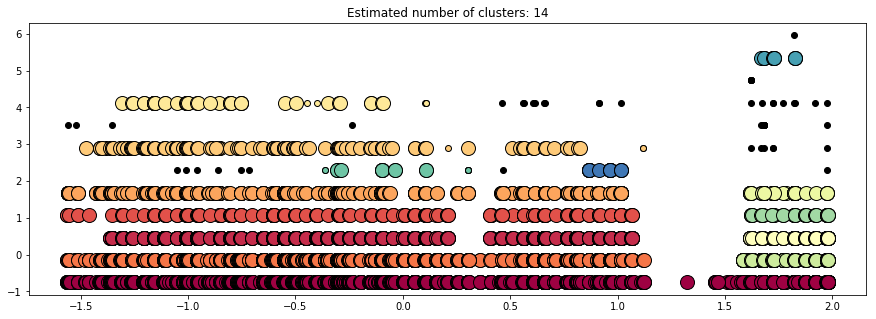

In [171]:
import numpy as np

from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets.samples_generator import make_blobs
from sklearn.preprocessing import StandardScaler

f14 = df2['actionc'].values

f15 = df2['created_atc'].values
X = np.array(list(zip(f15,f14)))
# X = np.array(list(zip(f1, f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15)))
# X = df2['age'].values
# print(X)
# X, labels_true = make_blobs(X, centers=centers, cluster_std=0.4,random_state=0)
X = StandardScaler().fit_transform(X)

db = DBSCAN(eps=0.3, min_samples=10).fit(X)
# print(db)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
# print(core_samples_mask)
core_samples_mask[db.core_sample_indices_] = True
# print(core_samples_mask)
labels = db.labels_

n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
print(n_clusters_)

print('Estimated number of clusters: %d' % n_clusters_)
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, labels))

# #############################################################################
# Plot result
import matplotlib.pyplot as plt
plt.figure(figsize=(15,5))

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

In [15]:
df_time = pd.to_datetime(df2["created_atc"])
day  = df_time.dt.day
date = df_time.dt.date
hour = df_time.dt.hour
df2['hourc'] = hour

In [16]:
df2.head()

,action,created_at,actionc,created_atc,hourc
0,enter,2018-02-21 08:30:45.169158+00,0.0,2018-02-21 15:30:45.169158+07:00,15
1,enter,2018-02-21 10:07:01.98235+00,0.0,2018-02-21 17:07:01.982350+07:00,17
2,เพิ่มเข้าตะกร้า,2018-02-21 10:10:14.041527+00,2.0,2018-02-21 17:10:14.041527+07:00,17
3,สั่งอาหาร,2018-02-21 10:15:29.73492+00,3.0,2018-02-21 17:15:29.734920+07:00,17
4,enter,2018-02-16 10:25:31.747361+00,0.0,2018-02-16 17:25:31.747361+07:00,17


62
Estimated number of clusters: 62
Silhouette Coefficient: 0.941


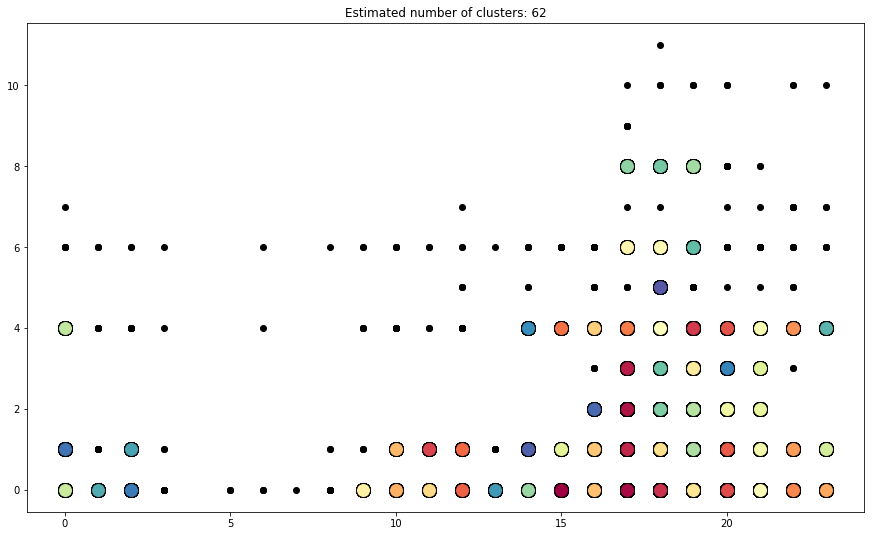

In [17]:
f1 = df2['actionc'].values
f2 = df2['hourc'].values
X = np.array(list(zip(f2,f1)))
# X = np.array(list(zip(f1, f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15)))
# X = df2['age'].values
# print(X)
# X, labels_true = make_blobs(X, centers=centers, cluster_std=0.4,random_state=0)
# X = StandardScaler().fit_transform(X)
#
db = DBSCAN(eps=0.3, min_samples=10).fit(X)
# print(db)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
# print(core_samples_mask)
core_samples_mask[db.core_sample_indices_] = True
# print(core_samples_mask)
labels = db.labels_

n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
print(n_clusters_)

print('Estimated number of clusters: %d' % n_clusters_)
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, labels))

# #############################################################################
# Plot result
import matplotlib.pyplot as plt
plt.figure(figsize=(15,9))

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

# plt.figure(figsize = (7,7))
plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()


In [18]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.decomposition import PCA # Principal Component Analysis module
from sklearn.cluster import KMeans # KMeans clustering 
import matplotlib.pyplot as plt # Python defacto plotting library
import seaborn as sns # More snazzy plotting library
%matplotlib inline 
# ts = pd.Series(df2['actionc'].values, index=pd.date_range(date, periods=1000))
# ts = ts.cumsum()
# ts.plot()

(array([736741., 736755., 736769., 736783., 736797., 736811.]),
 <a list of 6 Text xticklabel objects>)

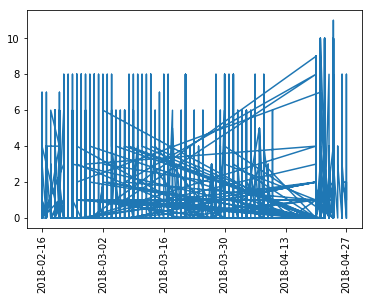

In [19]:
# df = df.sort_values('date', ascending=True)
plt.plot( date,df2['actionc'],)
plt.xticks(rotation='vertical')

In [ ]:
import matplotlib.pyplot as plt
# ax = df[['actionc']].plot(kind='bar', title ="V comp", figsize=(15, 10), legend=True, fontsize=12)
# ax.set_xlabel("Hour", fontsize=12)
# ax.set_ylabel("V", fontsize=12)
# plt.show()
# df2.plot(x="actionc", y="created_at", kind="bar")
df_group = df = pd.crosstab(date[10:], df2['actionc']) 

df_group.plot.bar(figsize=(20,30))

In [ ]:
# df = pd.read_csv('session_csv.csv') # reads the csv and creates the dataframe called movie
# df.head(n=2)
# df2=df2.drop(['id','user_id','value'],1)
action = {'enter':0,'enter_store':1,'เพิ่มเข้าตะกร้า':2,'สั่งอาหาร':3,'search_cate':4,
          'search_input':5,'กรอกประวัติความหิว':6,'like':7,'ใช้โค้ด':8,'click recommended menu':9,'click_genetic_rec':10,'click recommended menues':11}

for k,i in df2.iterrows():
    if i['action']==i['action']:
        df2.loc[k,"actionc"]=action[i['action']]
   

In [ ]:
df2.head()

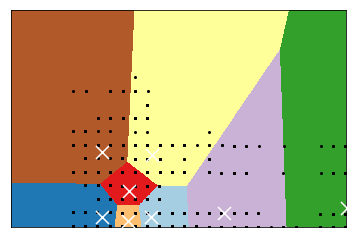

In [21]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA
f1 = df2['actionc'].values
f2 = df2['hourc'].values
X = np.array(list(zip(f2,f1)))
# X = np.array(list(zip(f2,f3)))
hpc = PCA(n_components=2).fit_transform(X)
k_means = KMeans()
k_means.fit(hpc)

x_min, x_max = hpc[:, 0].min() - 5, hpc[:, 0].max() - 1
y_min, y_max = hpc[:, 1].min(), hpc[:, 1].max() + 5
xx, yy = np.meshgrid(np.arange(x_min, x_max, .02), np.arange(y_min, y_max, .02))
Z = k_means.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation='nearest',
          extent=(xx.min(), xx.max(), yy.min(), yy.max()),
          cmap=plt.cm.Paired,
          aspect='auto', origin='lower')

plt.plot(hpc[:, 0], hpc[:, 1], 'k.', markersize=4)
centroids = k_means.cluster_centers_
inert = k_means.inertia_
plt.scatter(centroids[:, 0], centroids[:, 1],
           marker='x', s=169, linewidths=3,
           color='w', zorder=8)
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

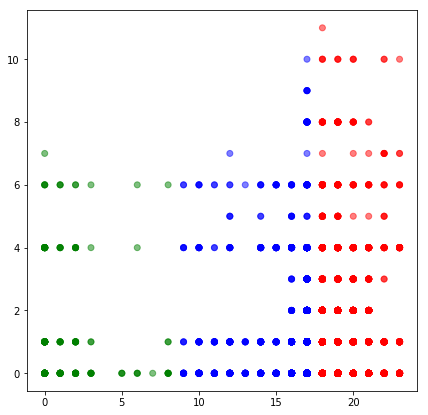

In [22]:

# Set a 3 KMeans clustering
kmeans = KMeans(n_clusters=3)
# Compute cluster centers and predict cluster indices
X_clustered = kmeans.fit_predict(X)

# Define our own color map
LABEL_COLOR_MAP = {0 : 'r',1 : 'g',2 : 'b'}
label_color = [LABEL_COLOR_MAP[l] for l in X_clustered]

# Plot the scatter digram
plt.figure(figsize = (7,7))
plt.scatter(X[:,0],X[:,1], c= label_color, alpha=0.5) 
plt.show()

In [23]:
df.head()
df2.head()

,action,created_at,actionc,created_atc,hourc
0,enter,2018-02-21 08:30:45.169158+00,0.0,2018-02-21 15:30:45.169158+07:00,15
1,enter,2018-02-21 10:07:01.98235+00,0.0,2018-02-21 17:07:01.982350+07:00,17
2,เพิ่มเข้าตะกร้า,2018-02-21 10:10:14.041527+00,2.0,2018-02-21 17:10:14.041527+07:00,17
3,สั่งอาหาร,2018-02-21 10:15:29.73492+00,3.0,2018-02-21 17:15:29.734920+07:00,17
4,enter,2018-02-16 10:25:31.747361+00,0.0,2018-02-16 17:25:31.747361+07:00,17


In [24]:
# df2.set_index("hourc",drop=True,inplace=True)
# df2.plot.bar()
# plt.show()

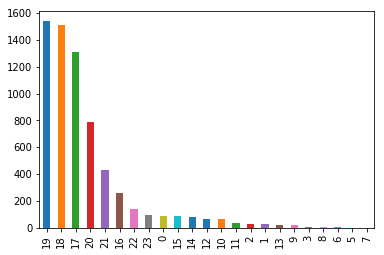

In [25]:
df2["hourc"].value_counts().plot(kind = "bar")
# df2.plot.bar(x='hourc')
# plt.show()

In [26]:
df3_drop2=df2.drop(['action','created_at','created_atc'],1)

In [27]:
df3_drop2.head()

,actionc,hourc
0,0.0,15
1,0.0,17
2,2.0,17
3,3.0,17
4,0.0,17


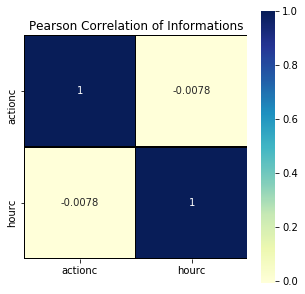

In [28]:
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(5, 5))
plt.title('Pearson Correlation of Informations')
# Draw the heatmap using seaborn
sns.heatmap(df3_drop2.astype(float).corr(),linewidths=0.25,vmax=1.0, square=True, cmap="YlGnBu", linecolor='black', annot=True)

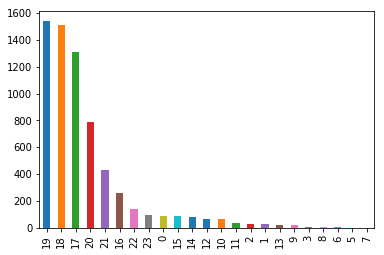

In [29]:
df3_drop2["hourc"].value_counts().plot(kind = "bar")


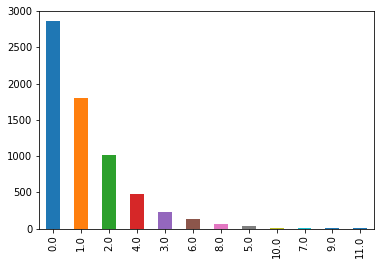

In [30]:
df3_drop2["actionc"].value_counts().plot(kind = "bar")


In [31]:
activity_duration = df3_drop2.groupby('hourc')['actionc'].sum()

In [32]:
activity_duration

hourc
0      136.0
1       45.0
2       46.0
3       12.0
5        0.0
6       10.0
7        0.0
8        8.0
9       31.0
10      74.0
11      32.0
12      95.0
13      12.0
14     116.0
15     124.0
16     305.0
17    1606.0
18    1826.0
19    1956.0
20     890.0
21     538.0
22     190.0
23     164.0
Name: actionc, dtype: float64

In [33]:
test=pd.DataFrame(activity_duration)
check=test.reset_index(inplace=True)
# check
test

,hourc,actionc
0,0,136.0
1,1,45.0
2,2,46.0
3,3,12.0
4,5,0.0
5,6,10.0
6,7,0.0
7,8,8.0
8,9,31.0
9,10,74.0


In [34]:
test['actionc']

0      136.0
1       45.0
2       46.0
3       12.0
4        0.0
5       10.0
6        0.0
7        8.0
8       31.0
9       74.0
10      32.0
11      95.0
12      12.0
13     116.0
14     124.0
15     305.0
16    1606.0
17    1826.0
18    1956.0
19     890.0
20     538.0
21     190.0
22     164.0
Name: actionc, dtype: float64

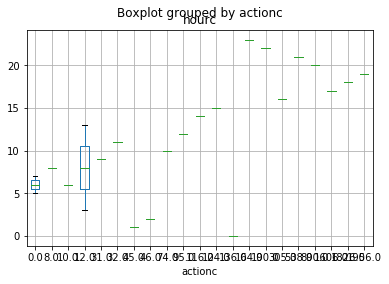

In [35]:
import matplotlib.pyplot as plt
%matplotlib inline
test.boxplot(column="hourc",by="actionc")

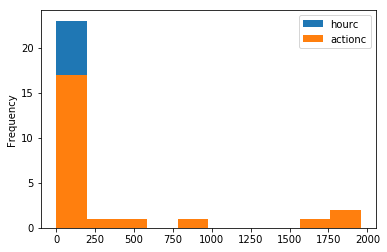

In [36]:
# test.hist(column="hourc",by="actionc",bins=30)
test.plot.hist(alpha=1)

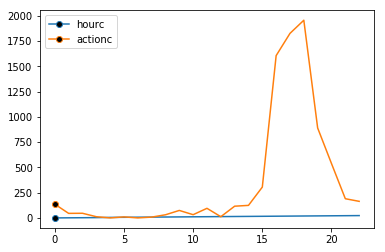

In [37]:
# df = pd.DataFrame(np.random.randn(1000, 4), index=pd.date_range('1/1/2000', periods=1000), columns=list('ABCD'))
# df = df.cumsum()

test.plot(linestyle='-', markevery=100, marker='o', markerfacecolor='black')

plt.show()

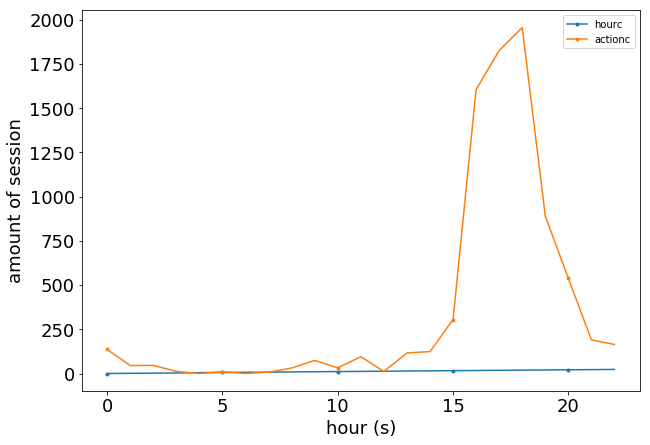

In [38]:
# plt.figure(figsize = (20,20))

test.plot(style='.-', markevery=5,figsize = (10,7))
plt.xlabel('hour (s)', fontsize=18)
plt.ylabel('amount of session' ,fontsize=18)
plt.xticks(size = 18)
plt.yticks(size = 18)
plt.show()

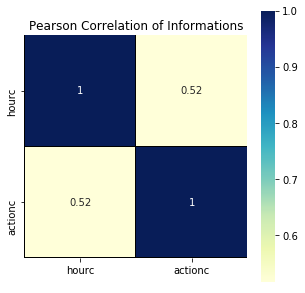

In [39]:
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(5, 5))
plt.title('Pearson Correlation of Informations')
# Draw the heatmap using seaborn
sns.heatmap(test.astype(float).corr(),linewidths=0.25,vmax=1.0, square=True, cmap="YlGnBu", linecolor='black', annot=True)

In [ ]:
df3_drop2=df2.drop(['action','created_at','created_atc'],1)

In [42]:
df2.head()

,action,created_at,actionc,created_atc,hourc
0,enter,2018-02-21 08:30:45.169158+00,0.0,2018-02-21 15:30:45.169158+07:00,15
1,enter,2018-02-21 10:07:01.98235+00,0.0,2018-02-21 17:07:01.982350+07:00,17
2,เพิ่มเข้าตะกร้า,2018-02-21 10:10:14.041527+00,2.0,2018-02-21 17:10:14.041527+07:00,17
3,สั่งอาหาร,2018-02-21 10:15:29.73492+00,3.0,2018-02-21 17:15:29.734920+07:00,17
4,enter,2018-02-16 10:25:31.747361+00,0.0,2018-02-16 17:25:31.747361+07:00,17


In [45]:
df4_drop2 = df2.drop(['action','created_at',],1)

In [48]:
df4_drop2.head()

,actionc,created_atc,hourc
0,0.0,2018-02-21 15:30:45.169158+07:00,15
1,0.0,2018-02-21 17:07:01.982350+07:00,17
2,2.0,2018-02-21 17:10:14.041527+07:00,17
3,3.0,2018-02-21 17:15:29.734920+07:00,17
4,0.0,2018-02-16 17:25:31.747361+07:00,17


In [49]:
# df = pd.DataFrame({'my_dates':['2015-01-01','2015-01-02','2015-01-03'],'myvals':[1,2,3]})
df['my_dates'] = pd.to_datetime(df4_drop2['created_atc'])
df['day_of_week'] = df['my_dates'].dt.weekday_name

In [59]:
df['day_of_week'] 
day_of_weeks_sum = df.groupby('day_of_week').value_counts()

AttributeError: 'DataFrameGroupBy' object has no attribute 'value_counts'

In [51]:
df.head()

,id,action,value,created_at,user_id,my_dates,day_of_week
0,1144,enter,home,2018-02-21 08:30:45.169158,52,2018-02-21 15:30:45.169158+07:00,Wednesday
1,1148,enter,home,2018-02-21 10:07:01.982350,52,2018-02-21 17:07:01.982350+07:00,Wednesday
2,1152,เพิ่มเข้าตะกร้า,แกงส้ม+ไข่เจียว,2018-02-21 10:10:14.041527,52,2018-02-21 17:10:14.041527+07:00,Wednesday
3,1160,สั่งอาหาร,76,2018-02-21 10:15:29.734920,52,2018-02-21 17:15:29.734920+07:00,Wednesday
4,411,enter,home,2018-02-16 10:25:31.747361,18,2018-02-16 17:25:31.747361+07:00,Friday


In [61]:
df['day_of_week'].value_counts()

Tuesday      1463
Friday       1166
Sunday       1127
Wednesday     967
Saturday      926
Thursday      559
Monday        438
Name: day_of_week, dtype: int64

In [73]:
type(df['day_of_week'].value_counts())

pandas.core.series.Series

In [93]:
df_dayWeeks=pd.DataFrame(df['day_of_week'].value_counts())


In [94]:
df_dayWeeks

,day_of_week
Tuesday,1463
Friday,1166
Sunday,1127
Wednesday,967
Saturday,926
Thursday,559
Monday,438


In [76]:
# pd.merge(test, df_dayWeeks, left_index=True, right_index=True)


In [96]:
# test.join(df_dayWeeks)
type(df_dayWeeks)

pandas.core.frame.DataFrame

In [87]:
# pd.merge(test, df_dayWeeks, left_on='actionc' ,right_index=True)
df_dayWeeks['actionc'] = test['actionc']

In [89]:
a = pd.merge(test, df_dayWeeks)

In [90]:
a

,hourc,actionc,day_of_week


In [92]:
df_dayWeeks

,day_of_week,actionc
Tuesday,1463,NaN
Friday,1166,NaN
Sunday,1127,NaN
Wednesday,967,NaN
Saturday,926,NaN
Thursday,559,NaN
Monday,438,NaN


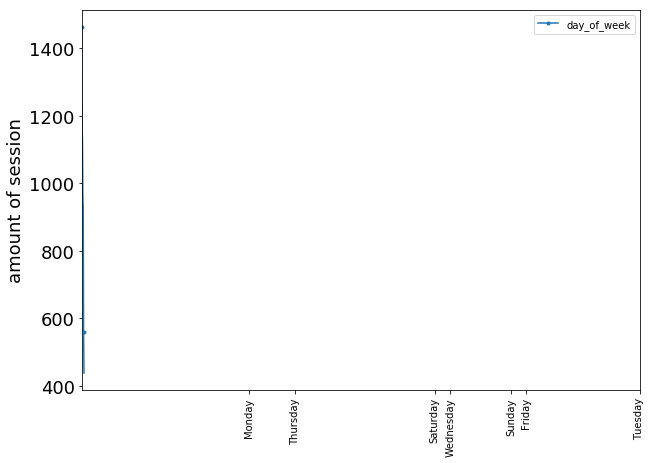

In [106]:
df_dayWeeks.plot(style='.-', markevery=5,figsize = (10,7))
# plt.xlabel('hour (s)', fontsize=18)
# plt.xticks(size = 18)
# plt.set_xticklabels(df_dayWeeks.index)
plt.xticks(df_dayWeeks.values, df_dayWeeks.index, rotation='vertical')

plt.yticks(size = 18)
plt.ylabel('amount of session' ,fontsize=18)

plt.show()

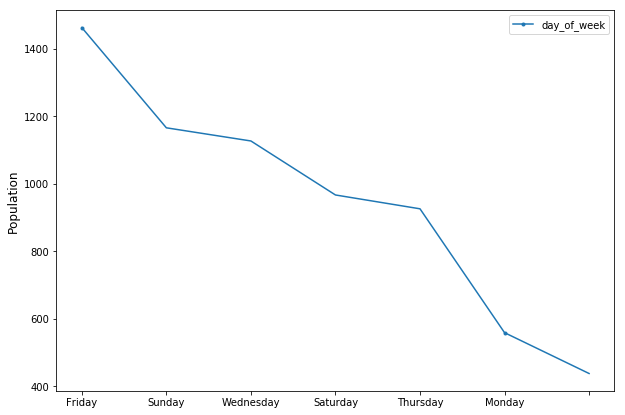

In [115]:
# df_dayWeeks.plot(style='.-', markevery=5,figsize = (10,7))

# plt.yticks(size = 18)
# plt.ylabel('amount of session' ,fontsize=18)

# plt.show()

# df_dayWeeks.plot(style='.-', markevery=5,figsize = (10,7))
# ax = df_dayWeeks[['day_of_week']].plot(kind='bar', title ="Population",figsize=(15,10),legend=True, fontsize=12)
ax= df_dayWeeks.plot(style='.-', markevery=5,figsize = (10,7))
# ax.set_xlabel("Areas",fontsize=12)
ax.set_xticklabels(df_dayWeeks.index)

ax.set_ylabel("Population",fontsize=12)
plt.show()

In [100]:
# df_dayWeeks.set_index('day_of_week').plot.bar(rot=0, title='Population', figsize=(15,10), fontsize=12)
# df_dayWeeks.plot()

# plt.show()
df_dayWeeks.index

Index(['Tuesday', 'Friday', 'Sunday', 'Wednesday', 'Saturday', 'Thursday',
       'Monday'],
      dtype='object')

In [152]:
df_dayWeeks

,day_of_week
Tuesday,1463
Friday,1166
Sunday,1127
Wednesday,967
Saturday,926
Thursday,559
Monday,438


In [155]:
df['hourc'] = hour
df.head()


,id,action,value,created_at,user_id,created_atc,hourc
0,1144,enter,home,2018-02-21 08:30:45.169158,52,2018-02-21 15:30:45.169158+07:00,15
1,1148,enter,home,2018-02-21 10:07:01.982350,52,2018-02-21 17:07:01.982350+07:00,17
2,1152,เพิ่มเข้าตะกร้า,แกงส้ม+ไข่เจียว,2018-02-21 10:10:14.041527,52,2018-02-21 17:10:14.041527+07:00,17
3,1160,สั่งอาหาร,76,2018-02-21 10:15:29.734920,52,2018-02-21 17:15:29.734920+07:00,17
4,411,enter,home,2018-02-16 10:25:31.747361,18,2018-02-16 17:25:31.747361+07:00,17


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


3
Estimated number of clusters: 3
Silhouette Coefficient: 0.134


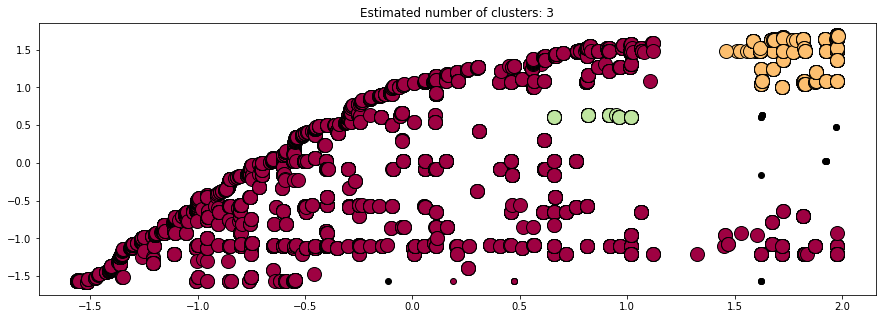

In [169]:
import numpy as np

from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets.samples_generator import make_blobs
from sklearn.preprocessing import StandardScaler

f14 = df['user_id'].values
f15 = df['created_atc'].values
X = np.array(list(zip(f15,f14)))
# X = np.array(list(zip(f1, f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15)))
# X = df2['age'].values
# print(X)
# X, labels_true = make_blobs(X, centers=centers, cluster_std=0.4,random_state=0)
X = StandardScaler().fit_transform(X)

db = DBSCAN(eps=0.3, min_samples=10).fit(X)
# print(db)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
# print(core_samples_mask)
core_samples_mask[db.core_sample_indices_] = True
# print(core_samples_mask)
labels = db.labels_

n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
print(n_clusters_)

print('Estimated number of clusters: %d' % n_clusters_)
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, labels))

# #############################################################################
# Plot result
import matplotlib.pyplot as plt
plt.figure(figsize=(15,5))

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

In [ ]:
test = df.loc[df['action'] == 'สั่งอาหาร']

In [ ]:
import numpy as np

from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets.samples_generator import make_blobs
from sklearn.preprocessing import StandardScaler

f14 = df['user_id'].values
f15 = df['hourc'].values
X = np.array(list(zip(f14,f15)))
# X = np.array(list(zip(f1, f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15)))
# X = df2['age'].values
# print(X)
# X, labels_true = make_blobs(X, centers=centers, cluster_std=0.4,random_state=0)
# X = StandardScaler().fit_transform(X)

db = DBSCAN(eps=0.3, min_samples=10).fit(X)
# print(db)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
# print(core_samples_mask)
core_samples_mask[db.core_sample_indices_] = True
# print(core_samples_mask)
labels = db.labels_

n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
print(n_clusters_)

print('Estimated number of clusters: %d' % n_clusters_)
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, labels))

# #############################################################################
# Plot result
import matplotlib.pyplot as plt
plt.figure(figsize=(15,5))

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

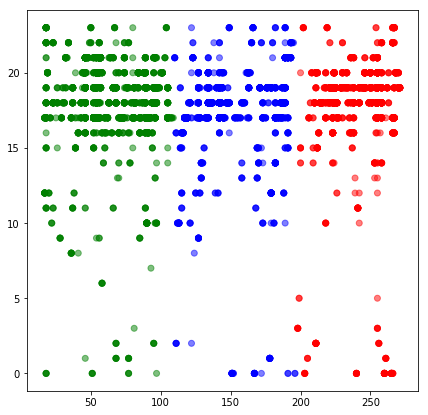

In [164]:
f14 = df['user_id'].values
f15 = df['hourc'].values
X = np.array(list(zip(f14,f15)))
# Set a 3 KMeans clustering
kmeans = KMeans(n_clusters=3)
# Compute cluster centers and predict cluster indices
X_clustered = kmeans.fit_predict(X)

# Define our own color map
LABEL_COLOR_MAP = {0 : 'r',1 : 'g',2 : 'b'}
label_color = [LABEL_COLOR_MAP[l] for l in X_clustered]

# Plot the scatter digram
plt.figure(figsize = (7,7))
plt.scatter(X[:,0],X[:,1], c= label_color, alpha=0.5) 
plt.show()